In [13]:
#Standard Header used on the projects

#first the major packages used for math and graphing
import numpy as np
import matplotlib.pyplot as plt
from cycler import cycler
import scipy.special as sp
import pandas as pd

#Custome graph format style sheet
plt.style.use('Prospectus.mplstyle')

#If being run by a seperate file, use the seperate file's graph format and saving paramaeters
#otherwise set what is needed
if not 'Saving' in locals():
    Saving = False
if not 'Titles' in locals():
    Titles = True
if not 'Ledgends' in locals():
    Ledgends = True
if not 'FFormat' in locals():
    FFormat = '.png'
if not 'location' in locals():
    #save location.  First one is for running on home PC, second for running on the work laptop.  May need to make a global change
    #location = 'E:\\Documents\\Dan\\Code\\Prospectus\\Document\\Figures\\'
    #location = 'C:\\Users\\dhendrickson\\Documents\\github\\FigsAndPlots\\FigsAndPlotsDocument\\Figures\\'
    location = 'E:\\Documents\\Dan\\Phd\\Play\\'

#Standard cycle for collors and line styles
default_cycler = (cycler('color', ['0.00', '0.40', '0.60', '0.70']) + cycler(linestyle=['-', '--', ':', '-.']))
plt.rc('axes', prop_cycle=default_cycler)
my_cmap = plt.get_cmap('gray')

In [1]:
#Extra Headers:
import os as os
import statistics as st
import os as os
import pandas as pd
import random
import multiprocessing
from joblib import Parallel, delayed
import time
import DWFT as fp


In [15]:
#Columns names for a file with all 6 dimmensions
Header = np.array(['Date','Hour','Min','Second','FracSec', 'X1','Y1','Z1','X2','Y2','Z2', 'X3','Y3','Z3','X4','Y4','Z4', 'X5','Y5','Z5','X6','Y6','Z6'])

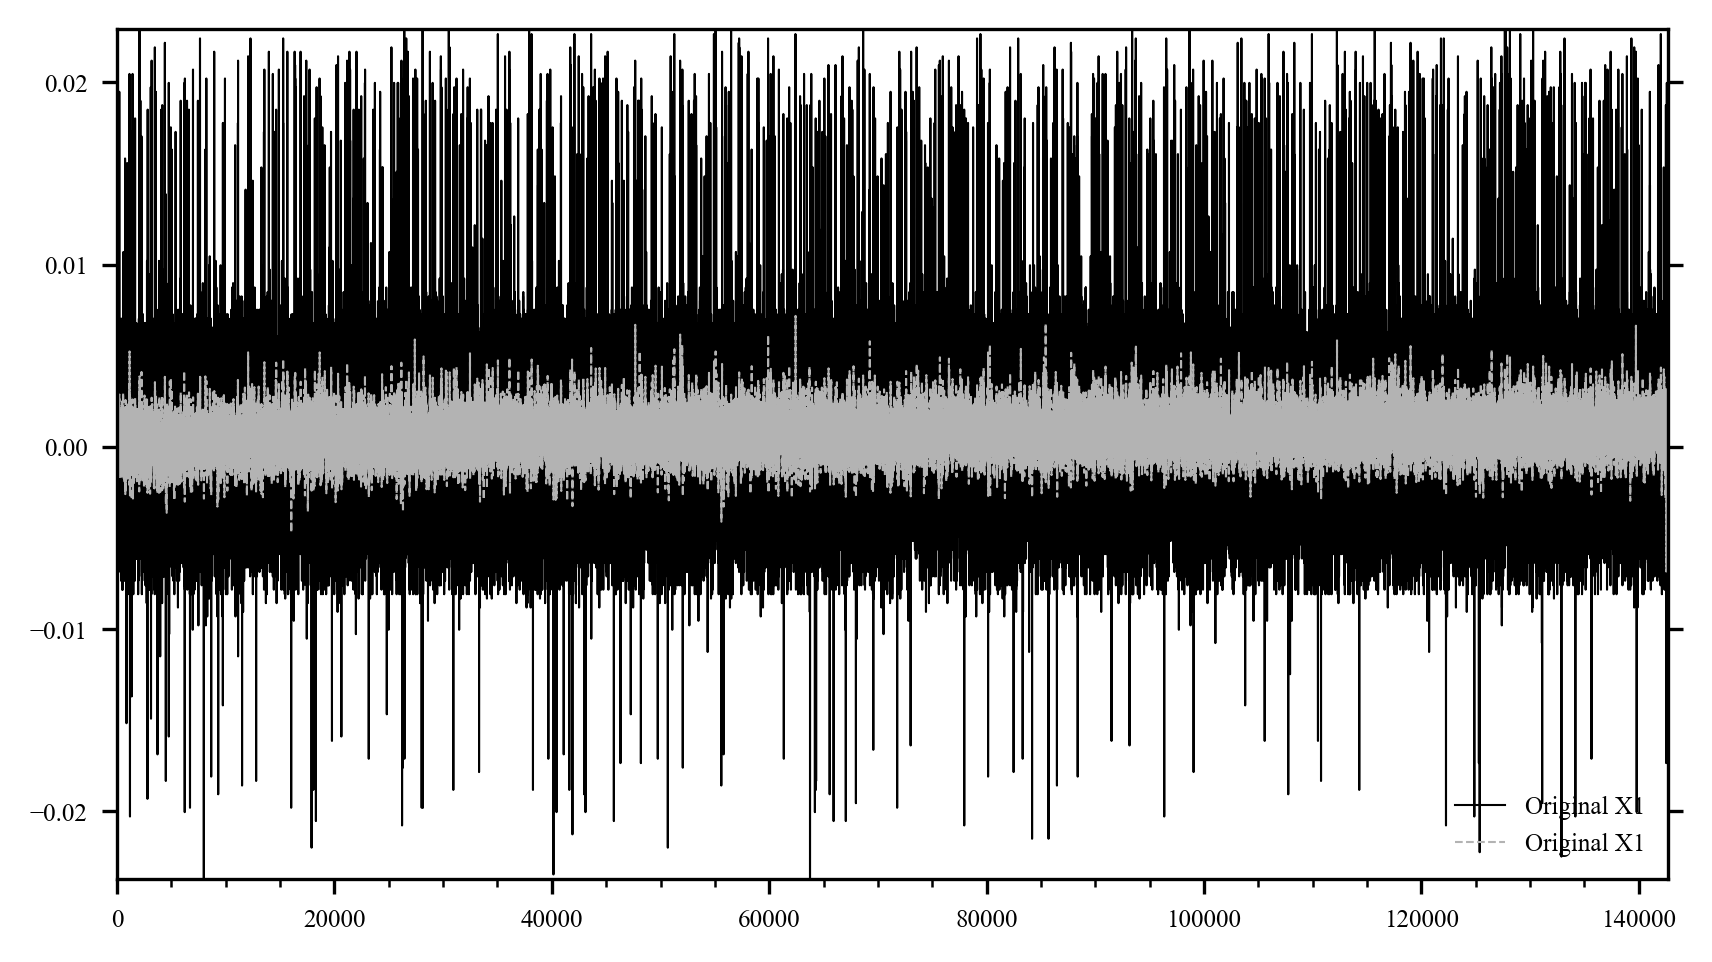

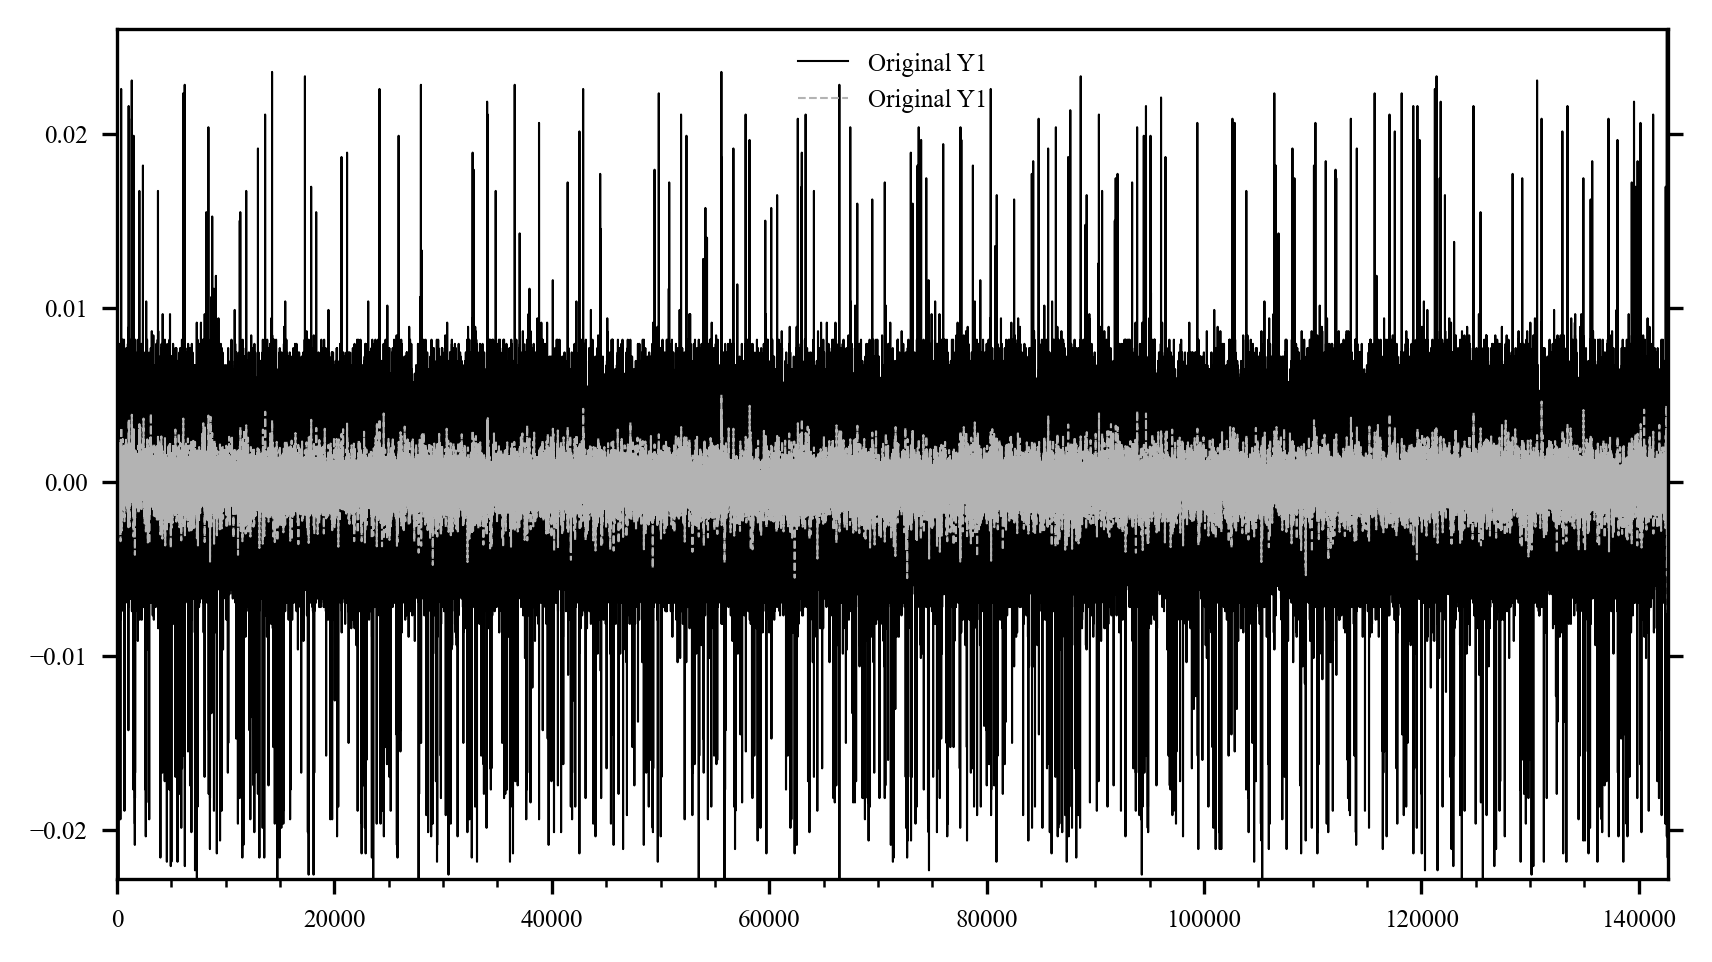

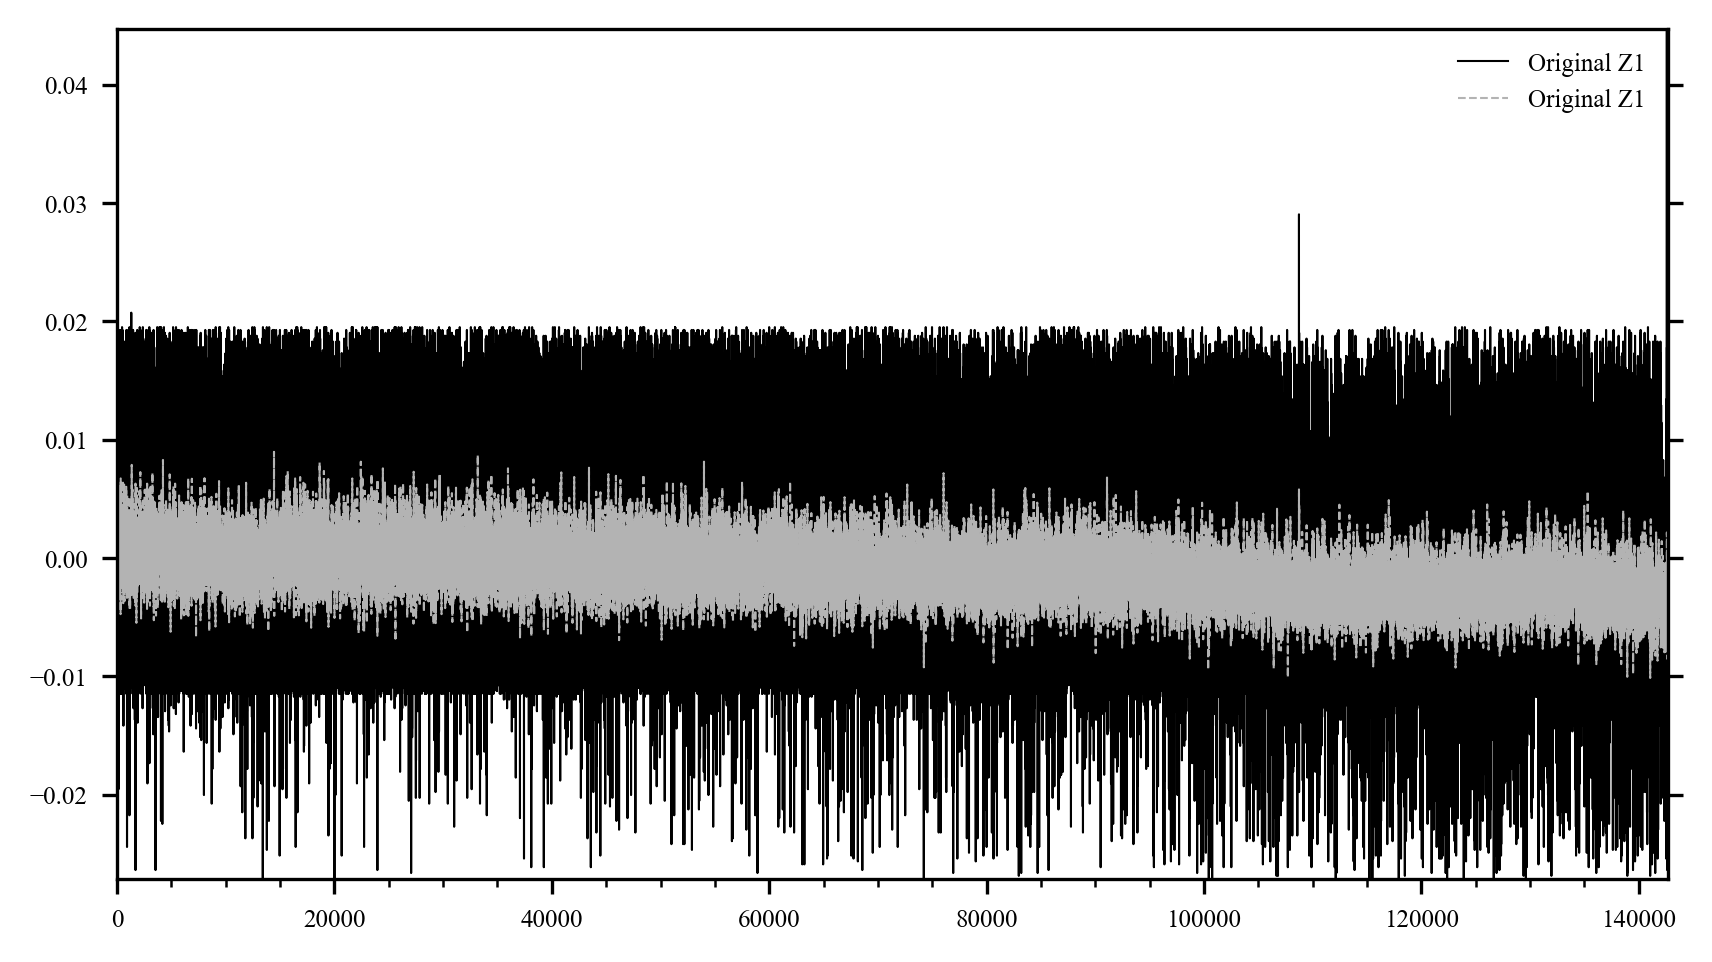

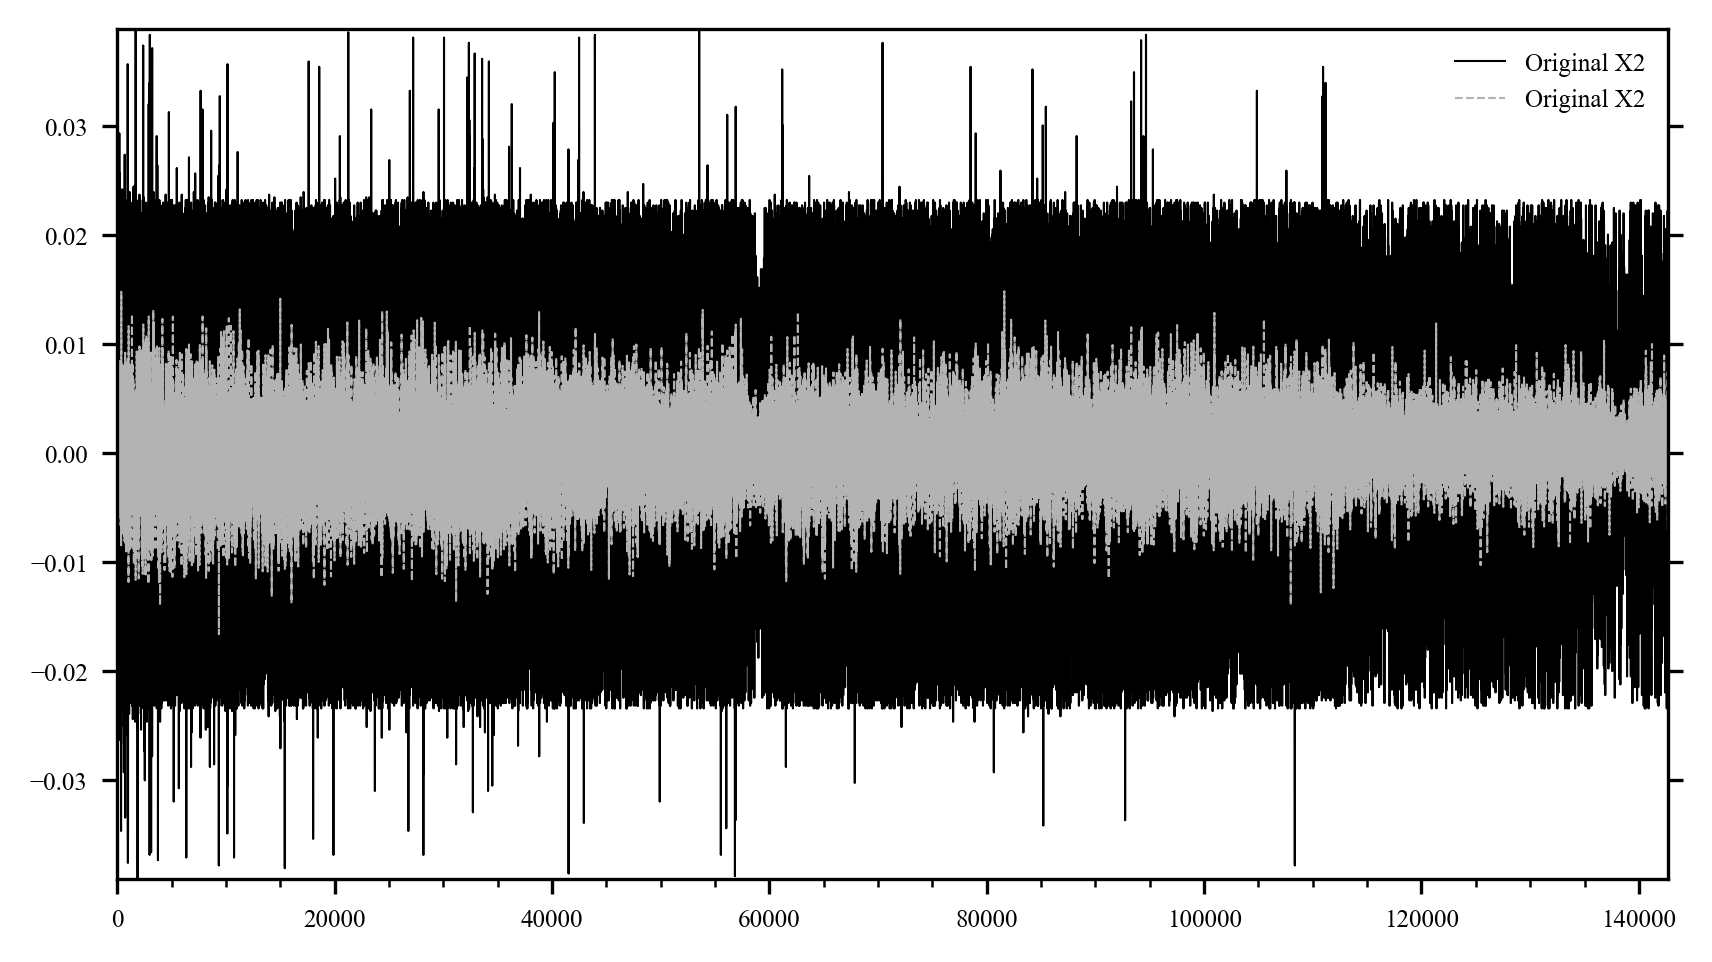

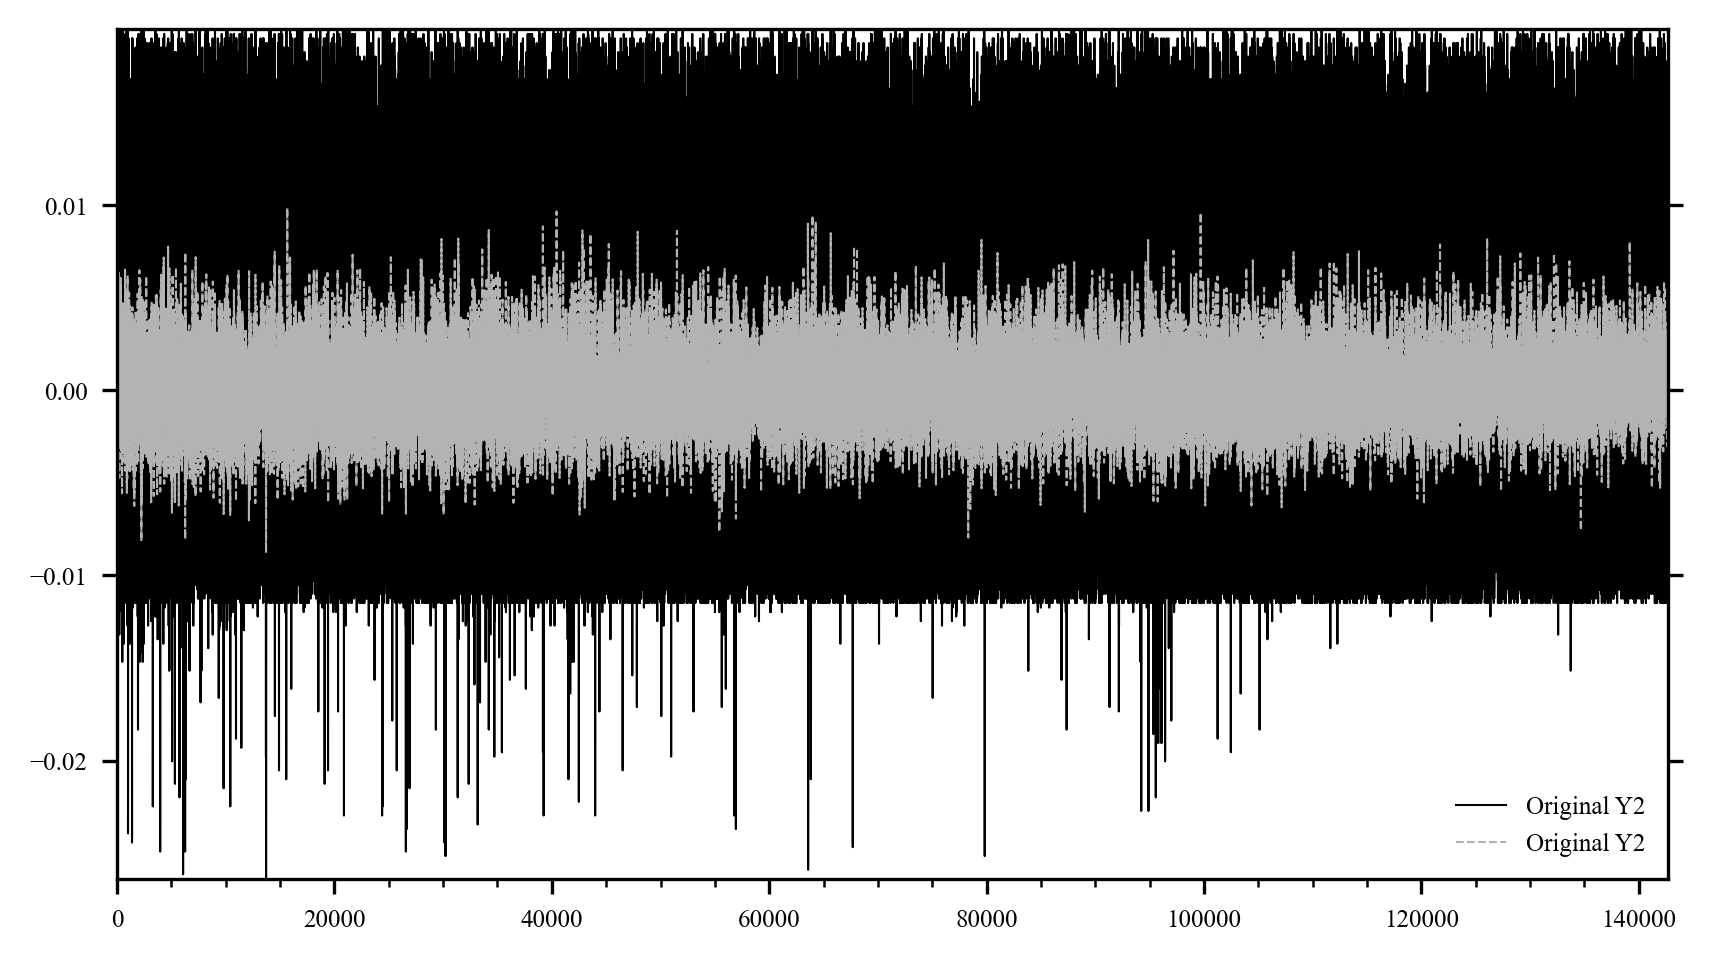

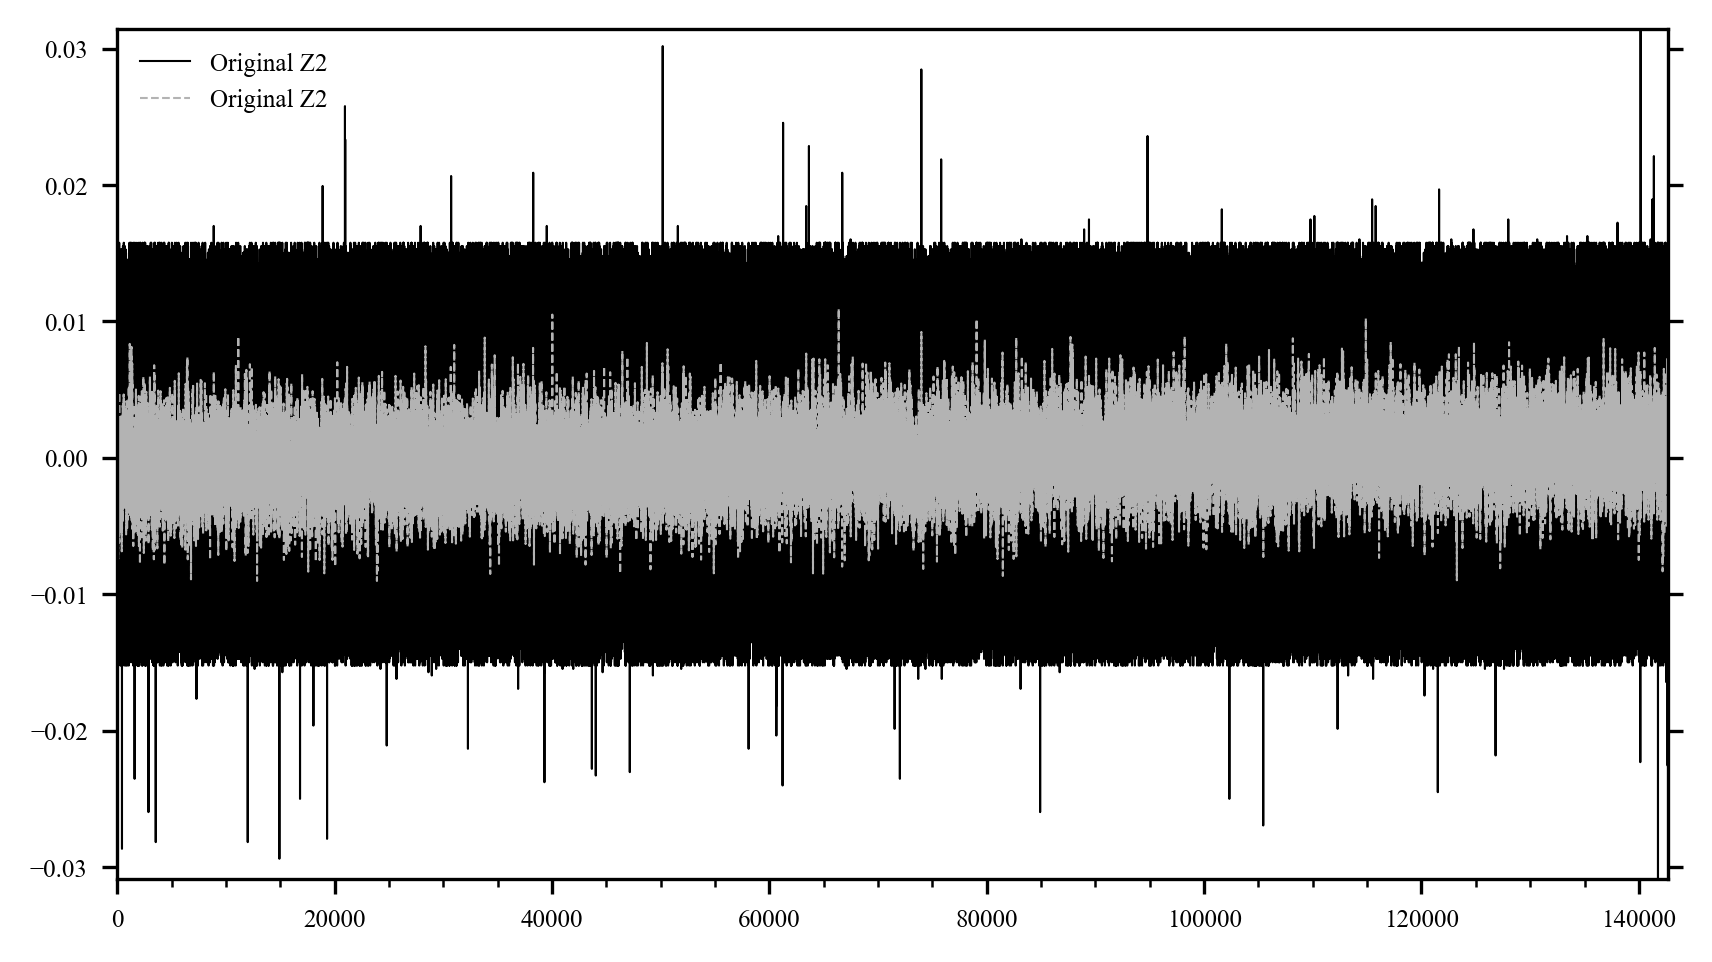

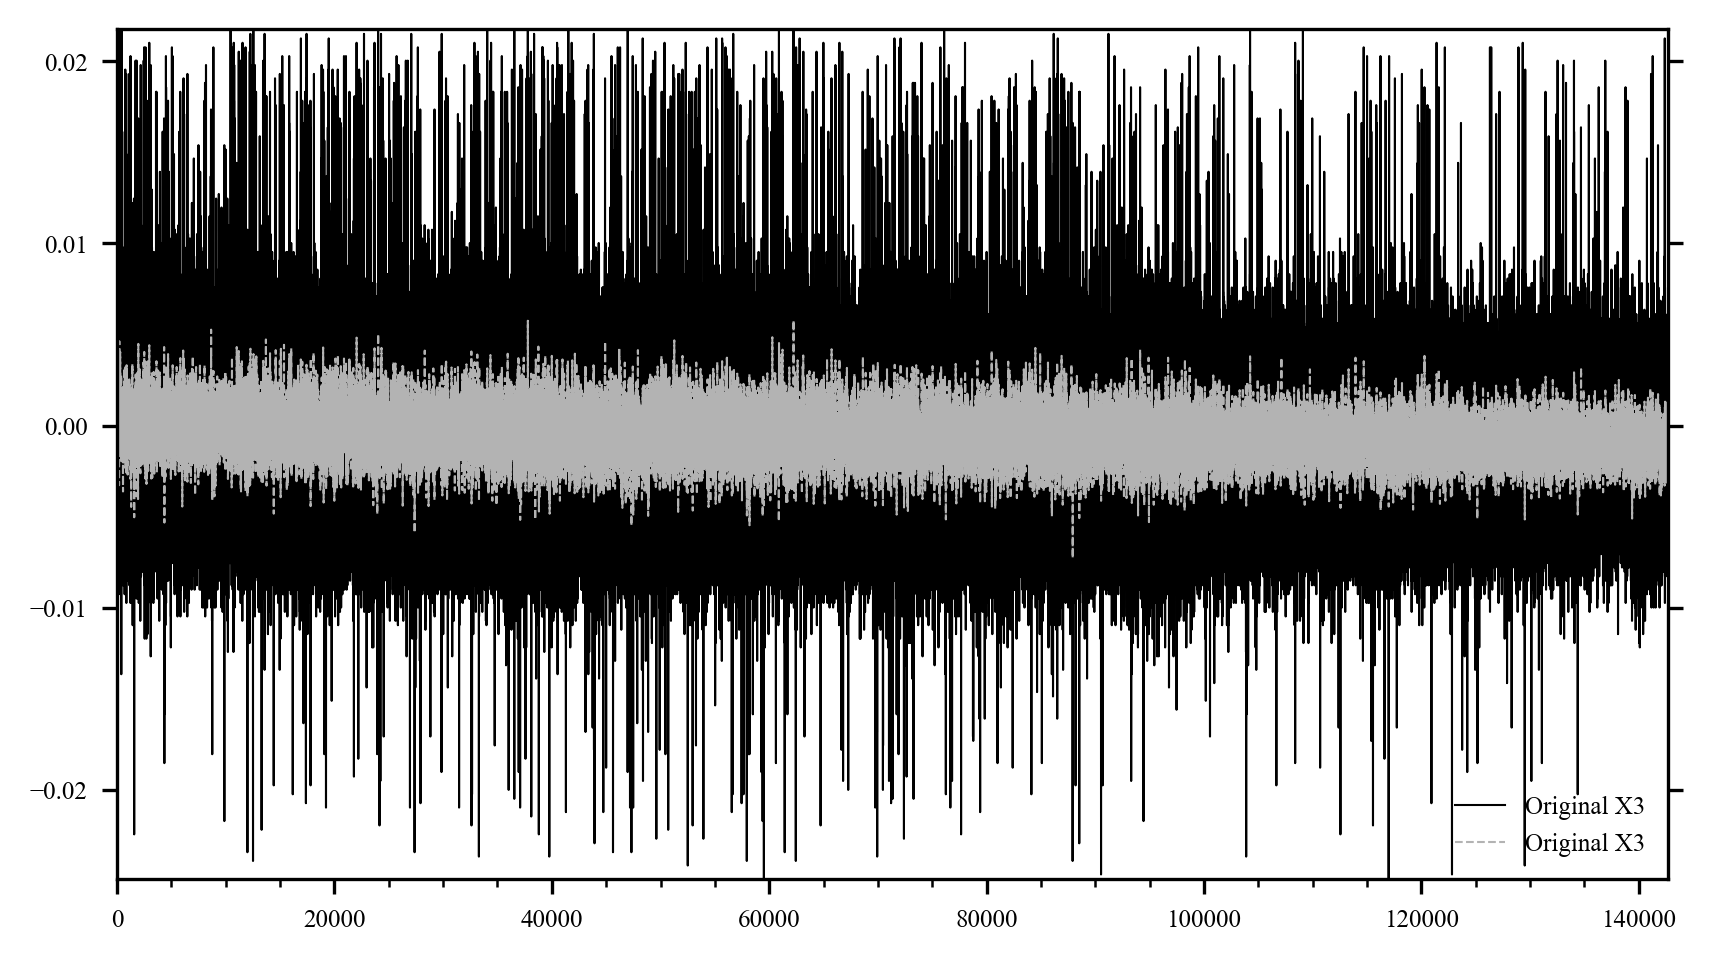

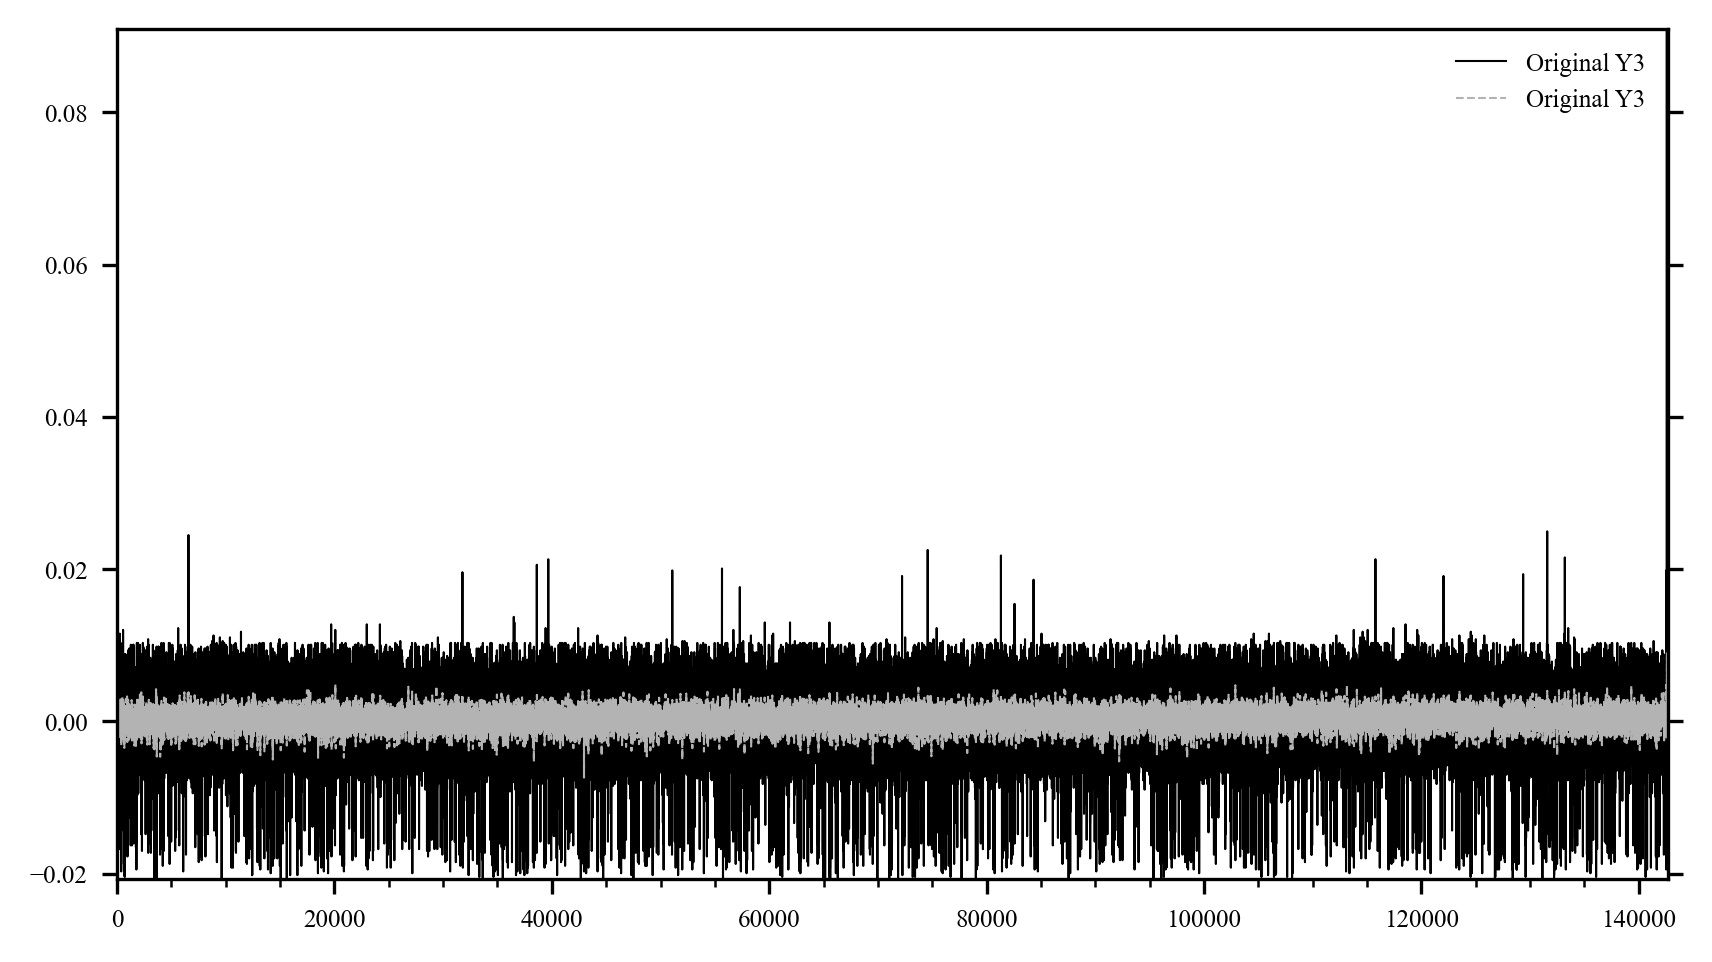

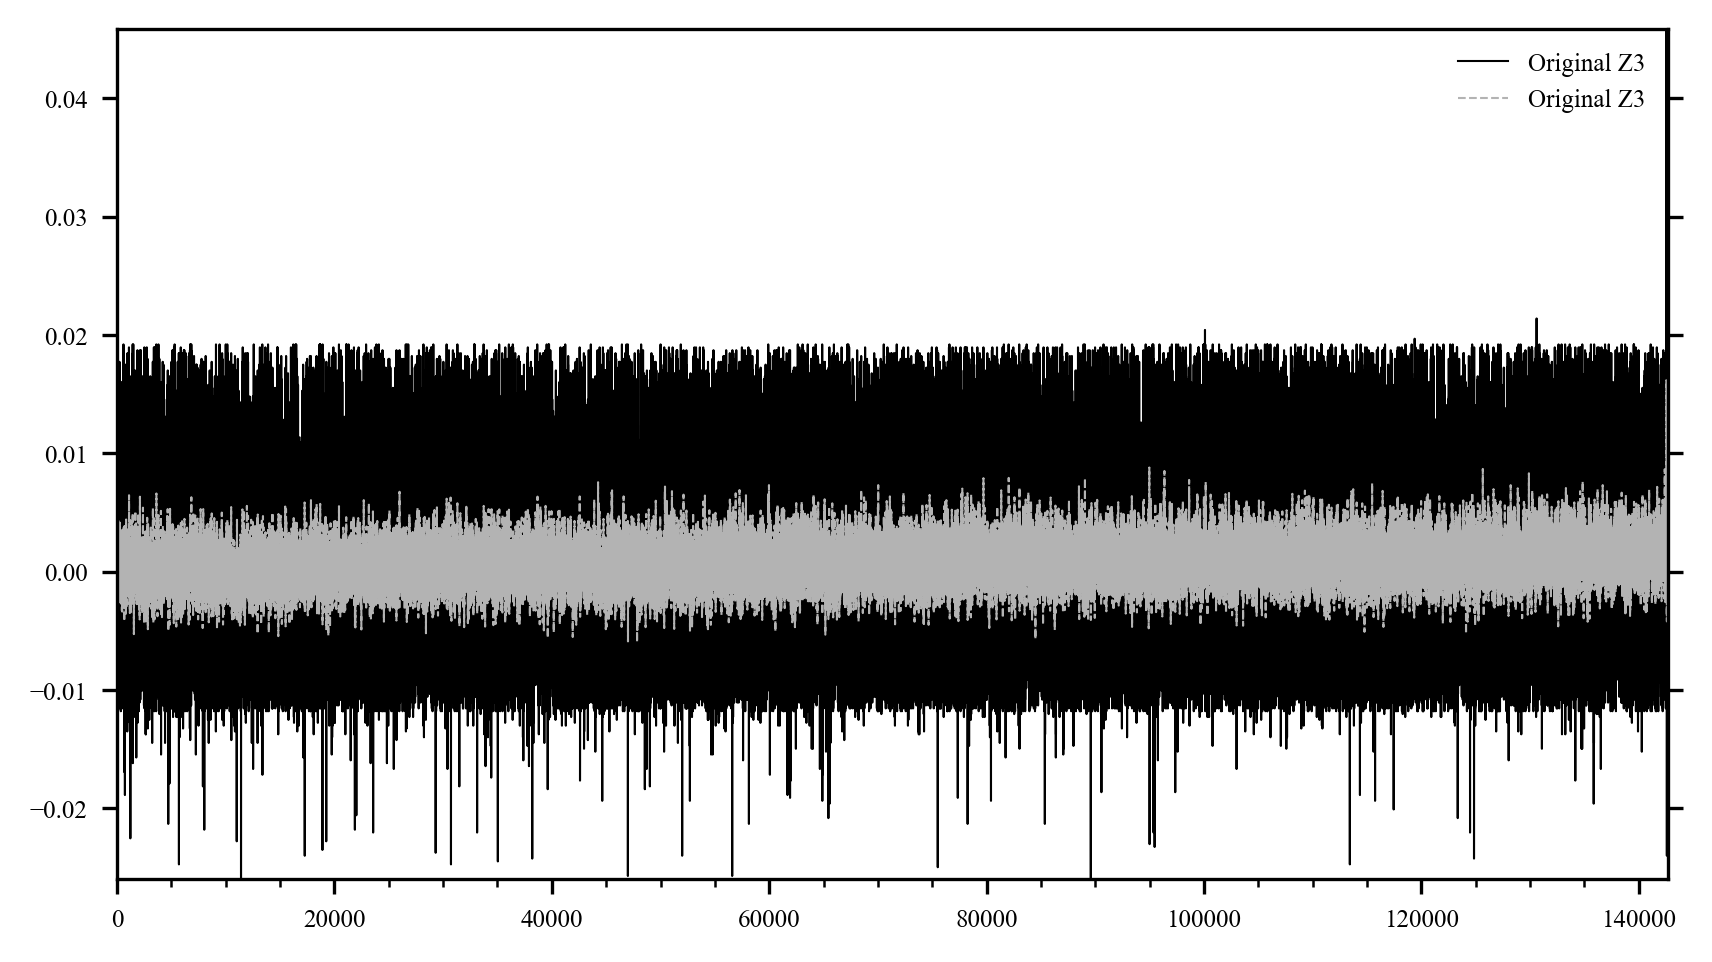

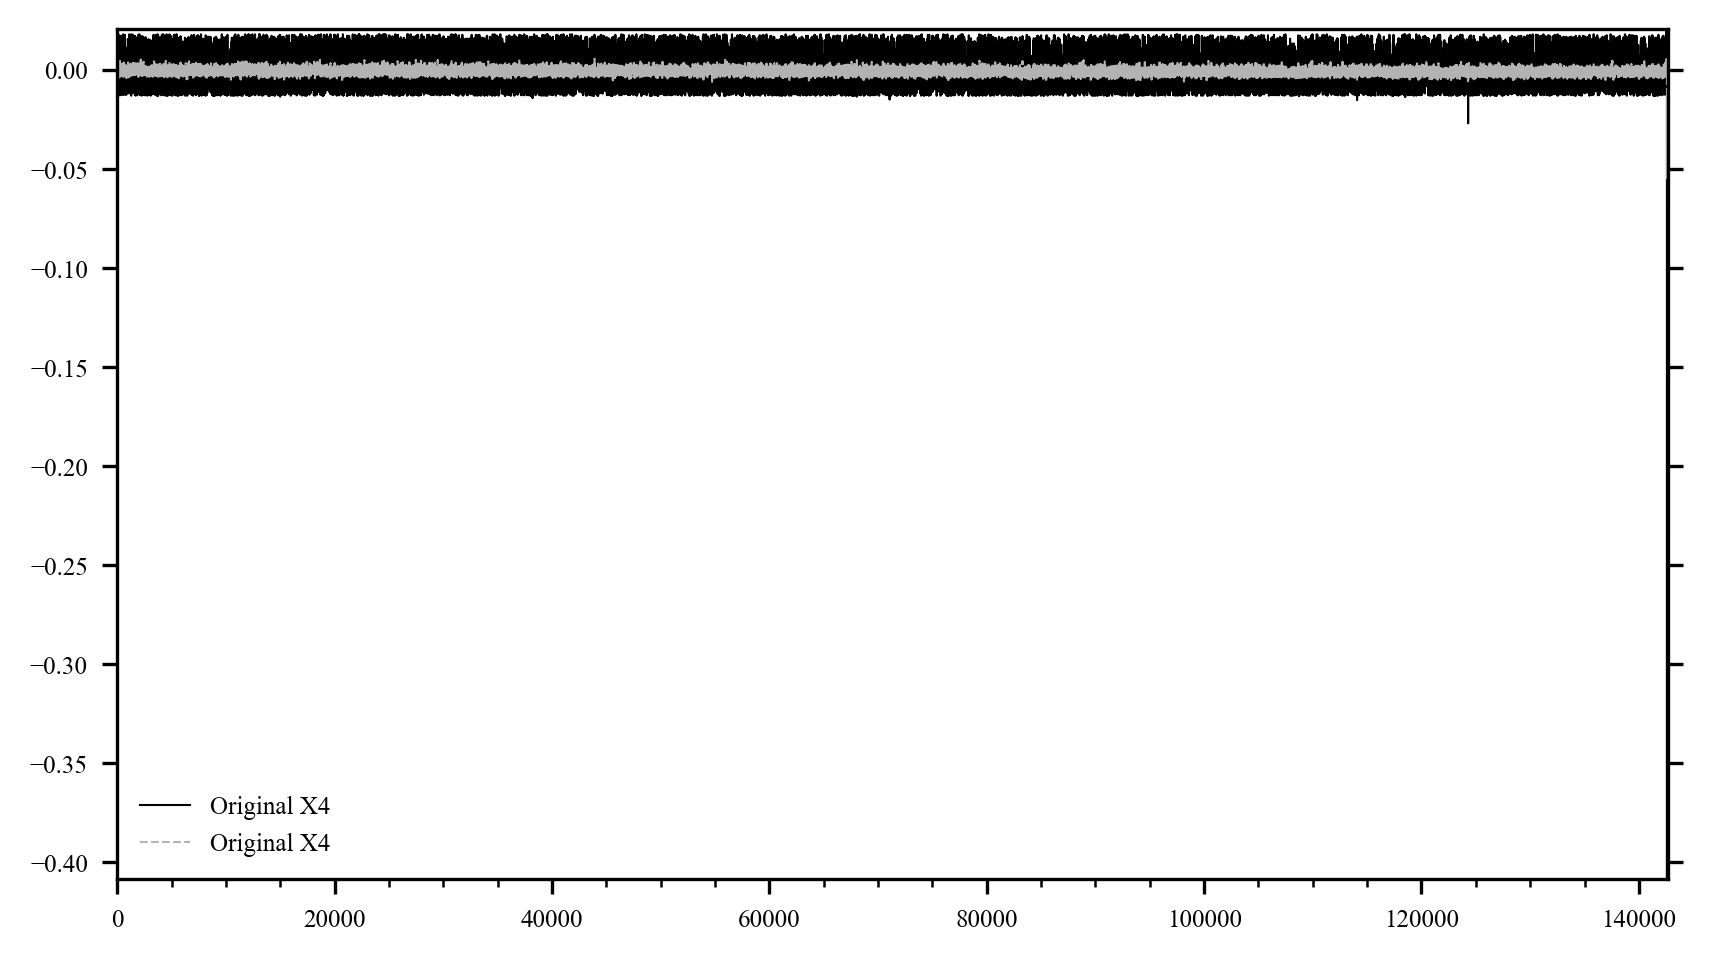

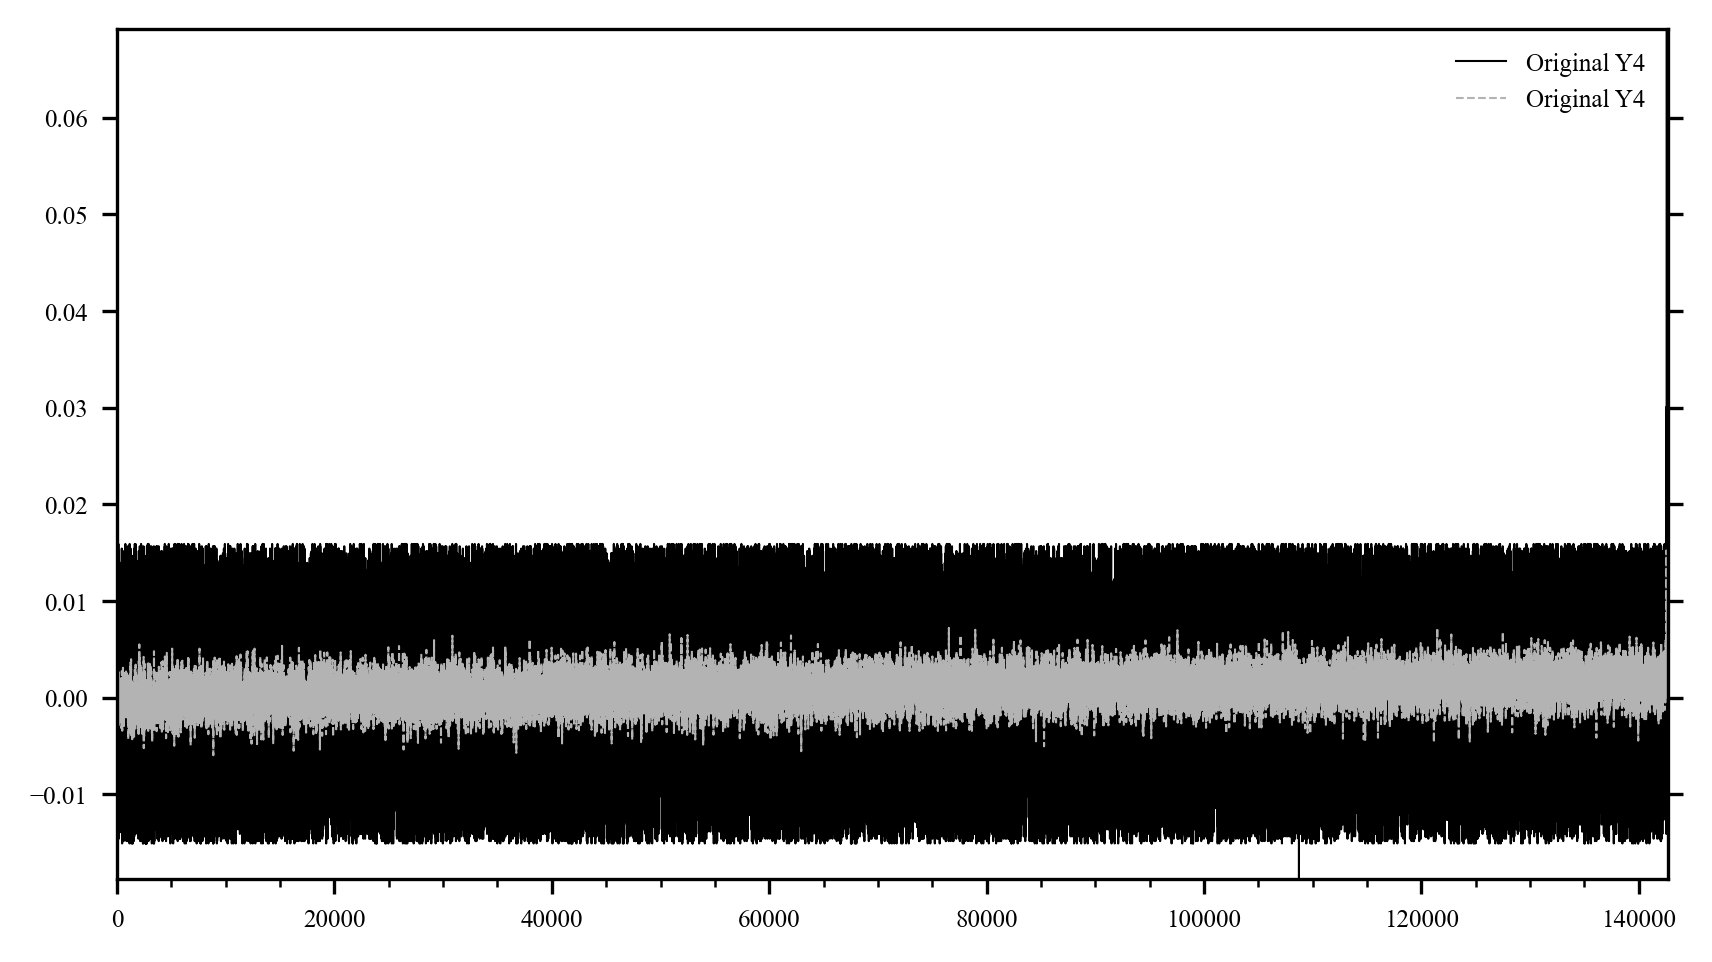

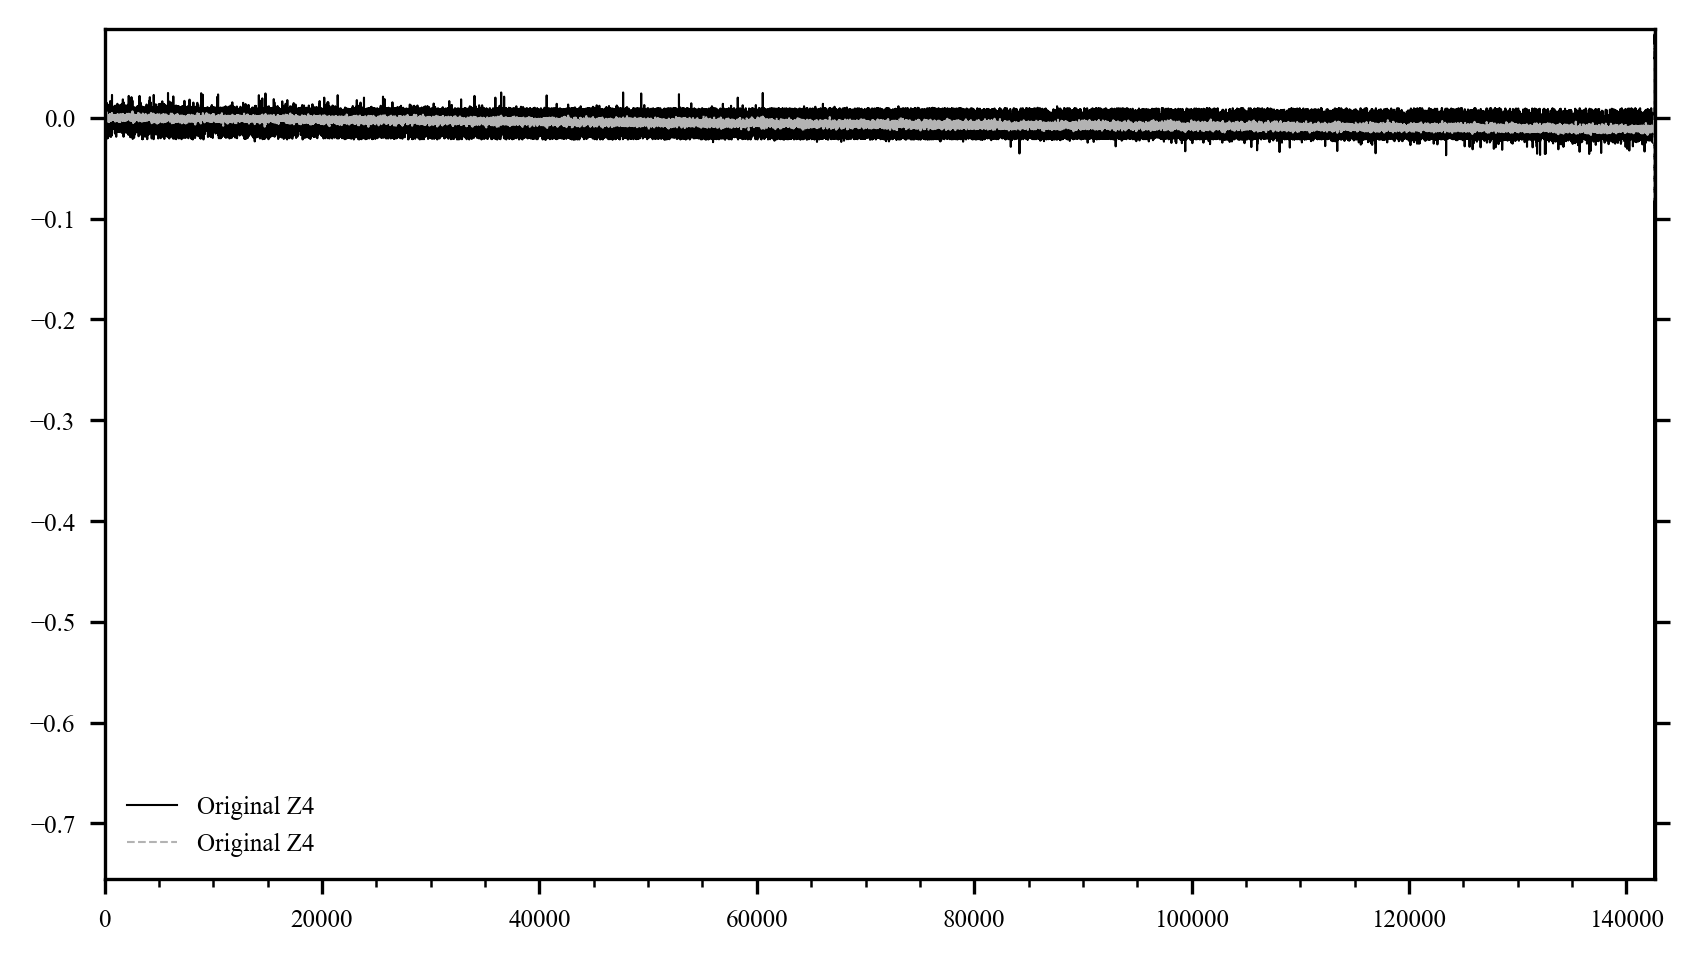

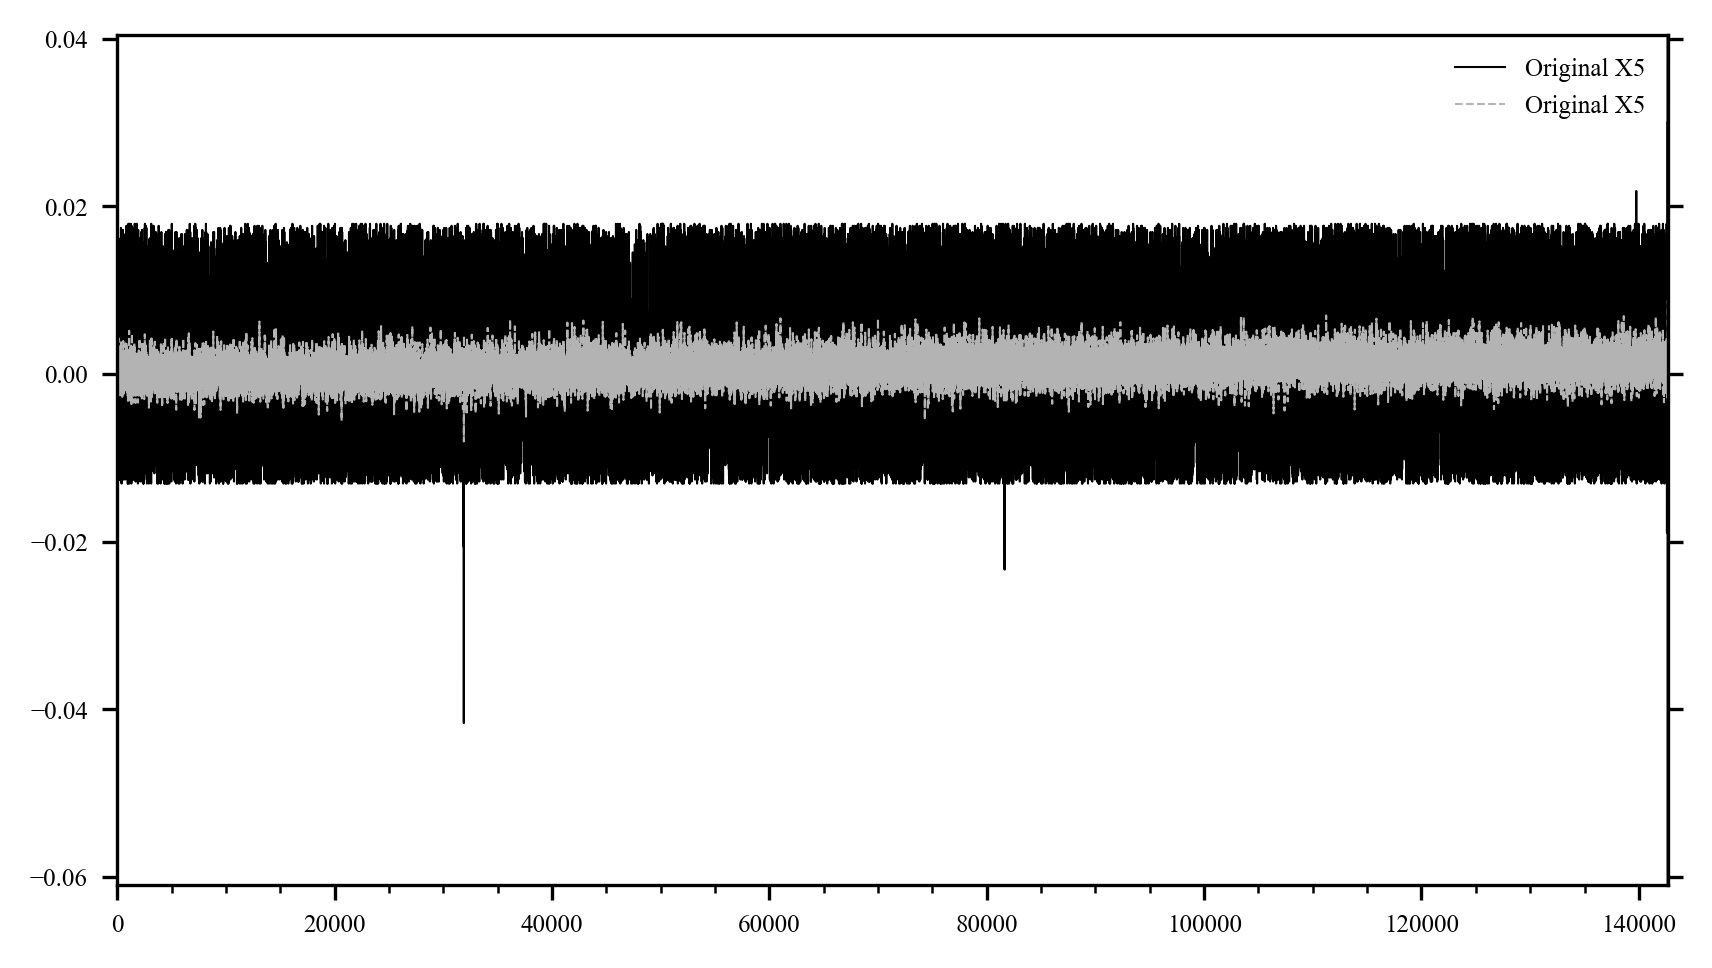

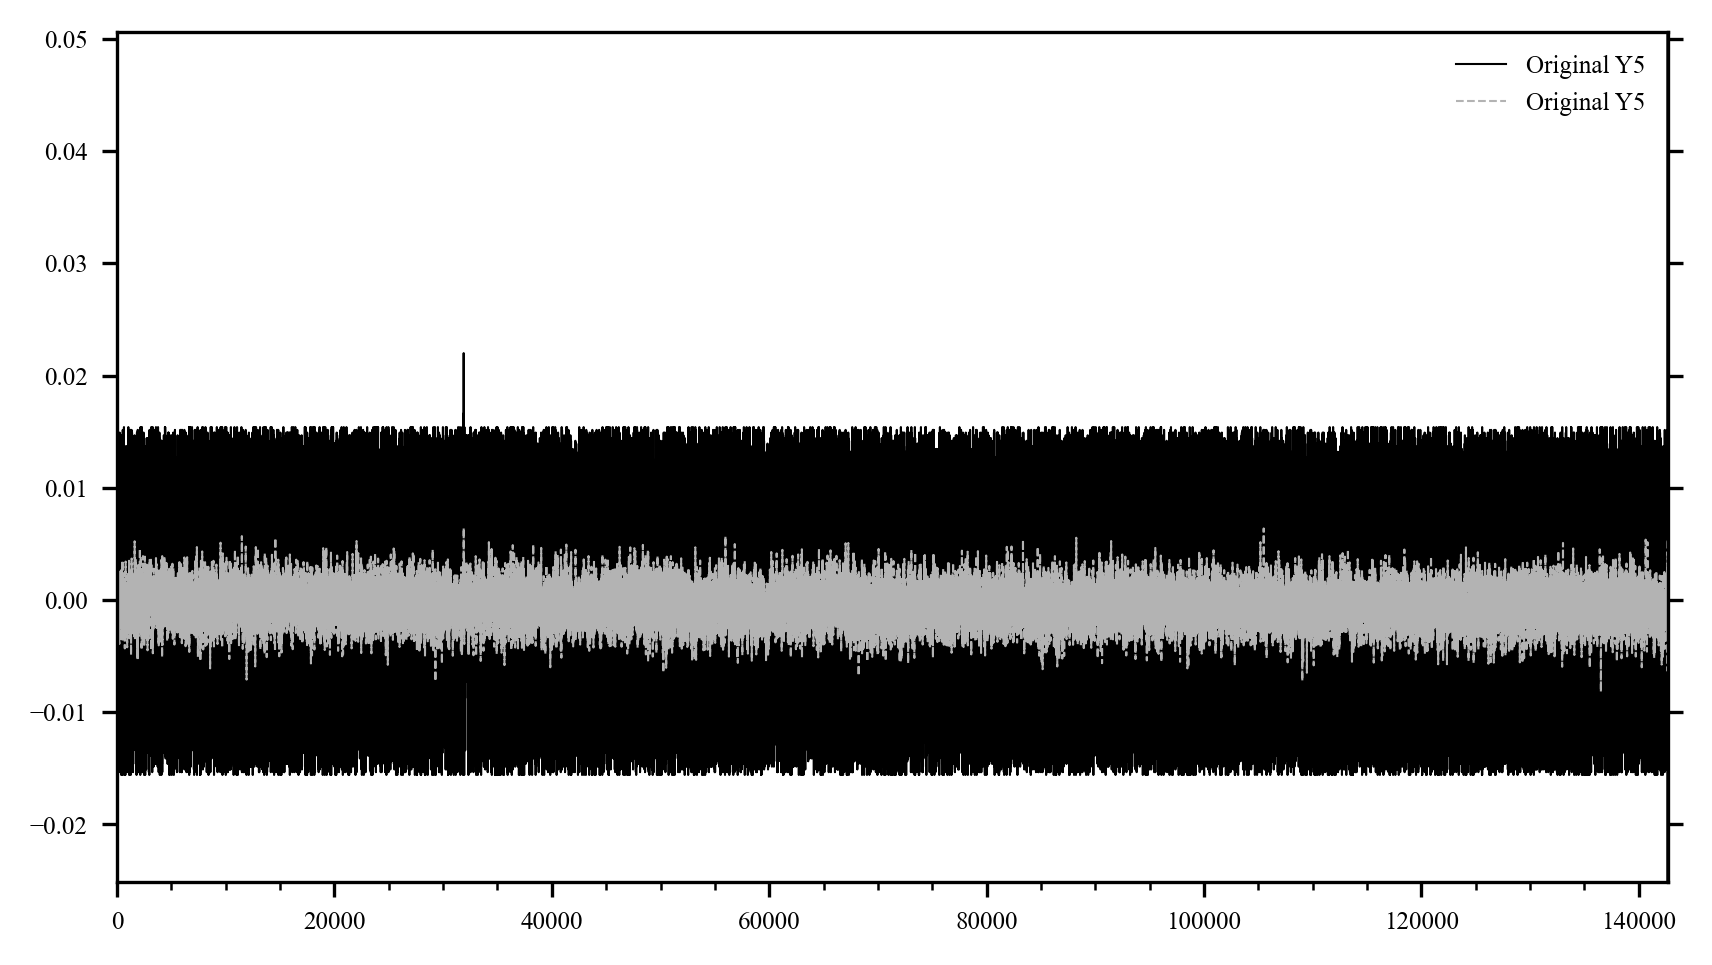

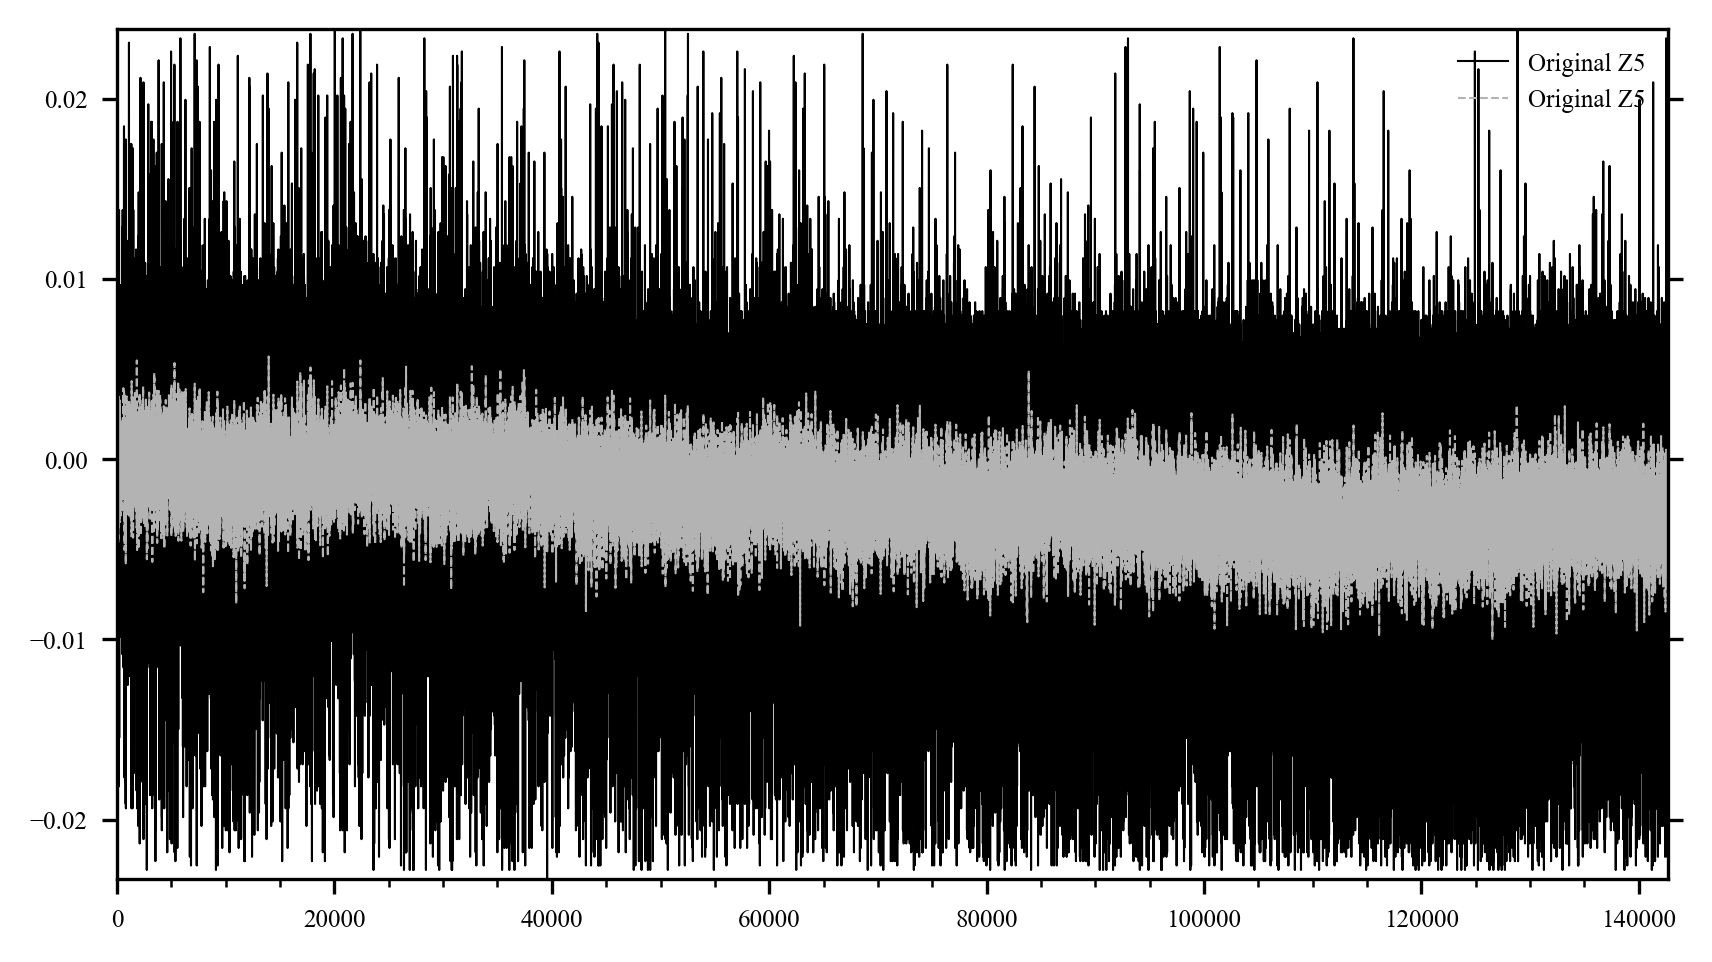

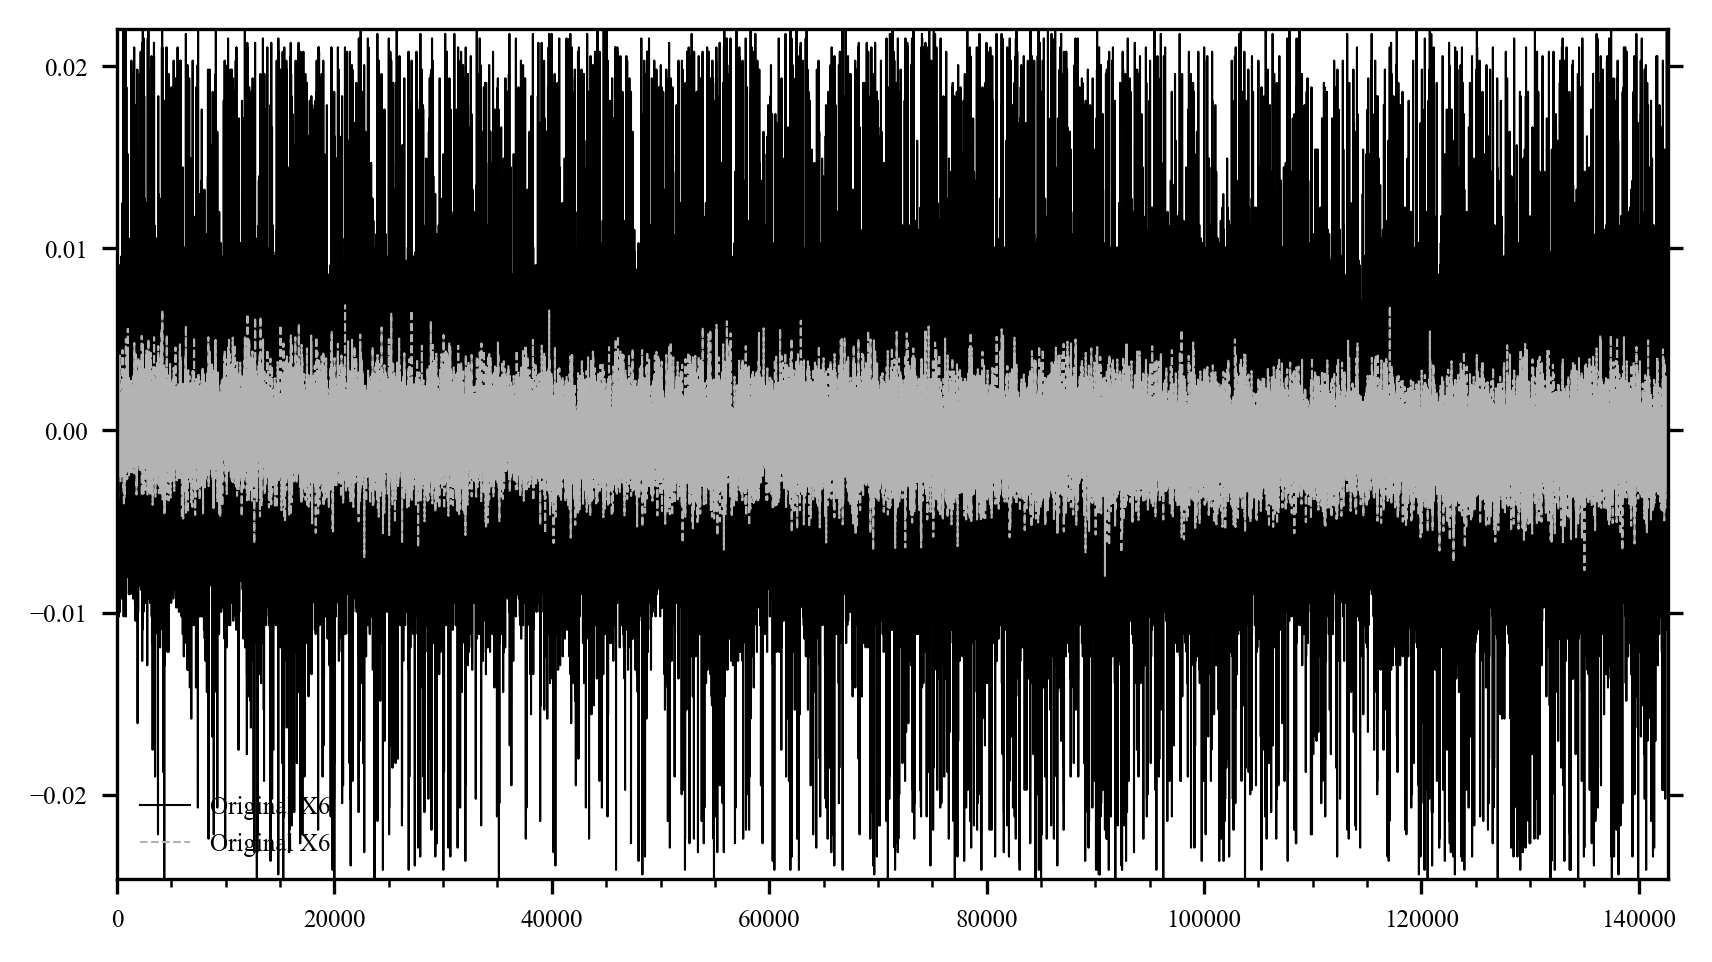

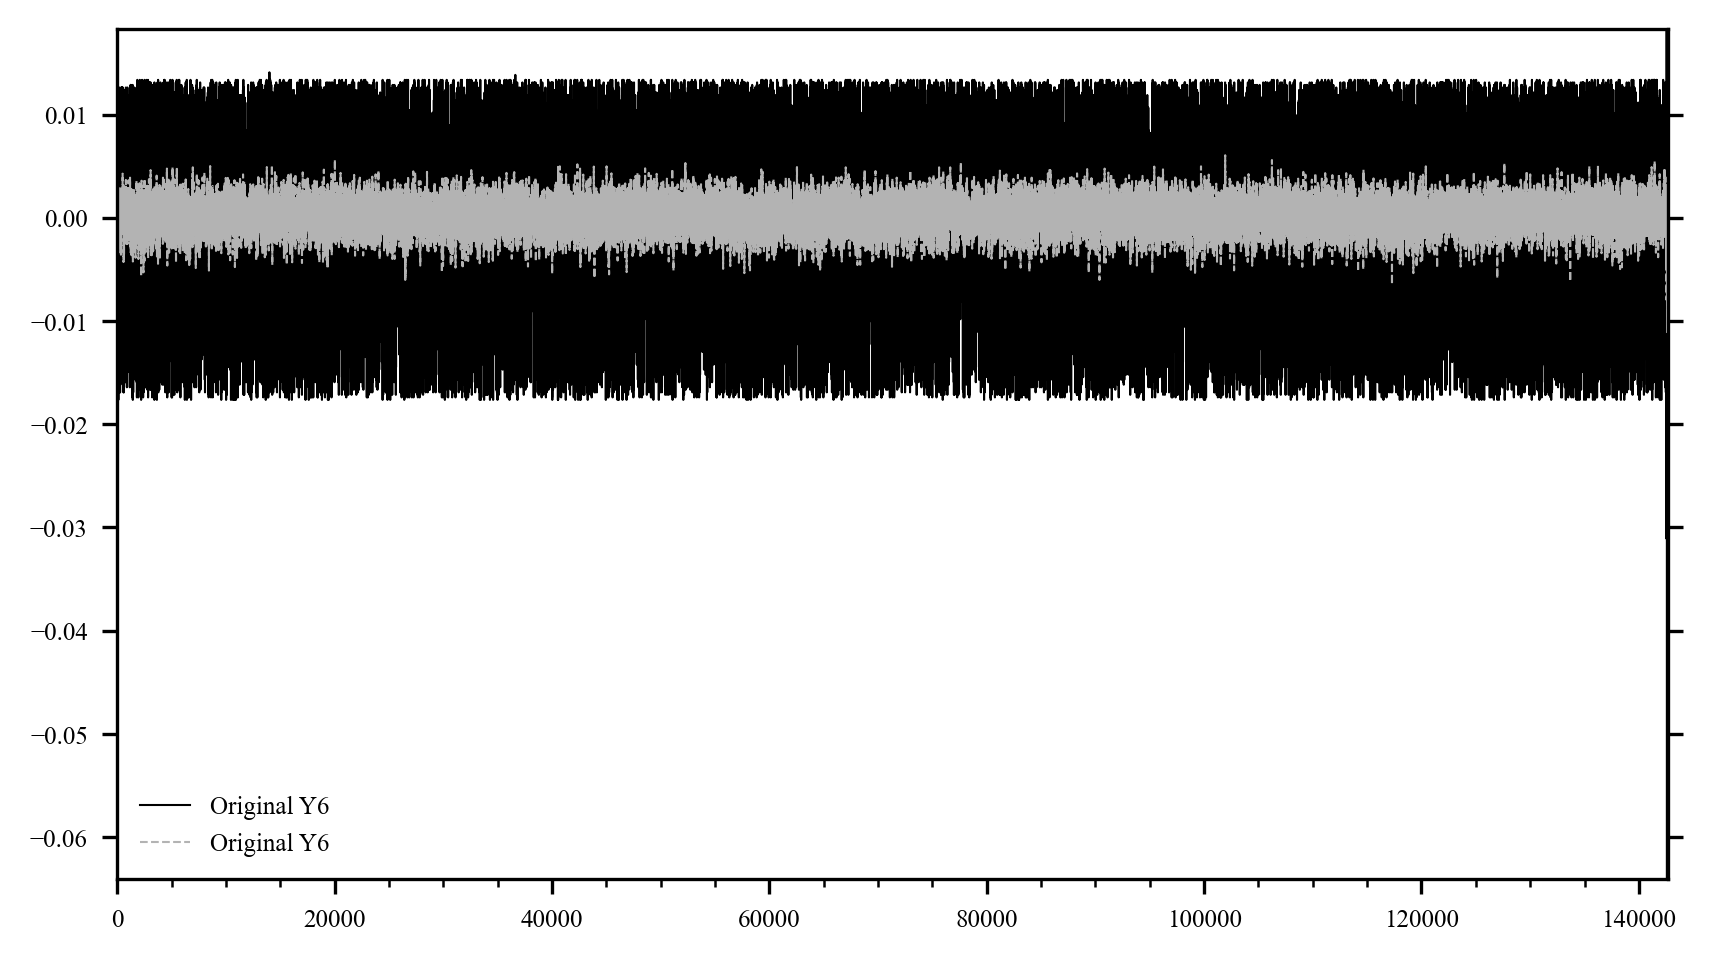

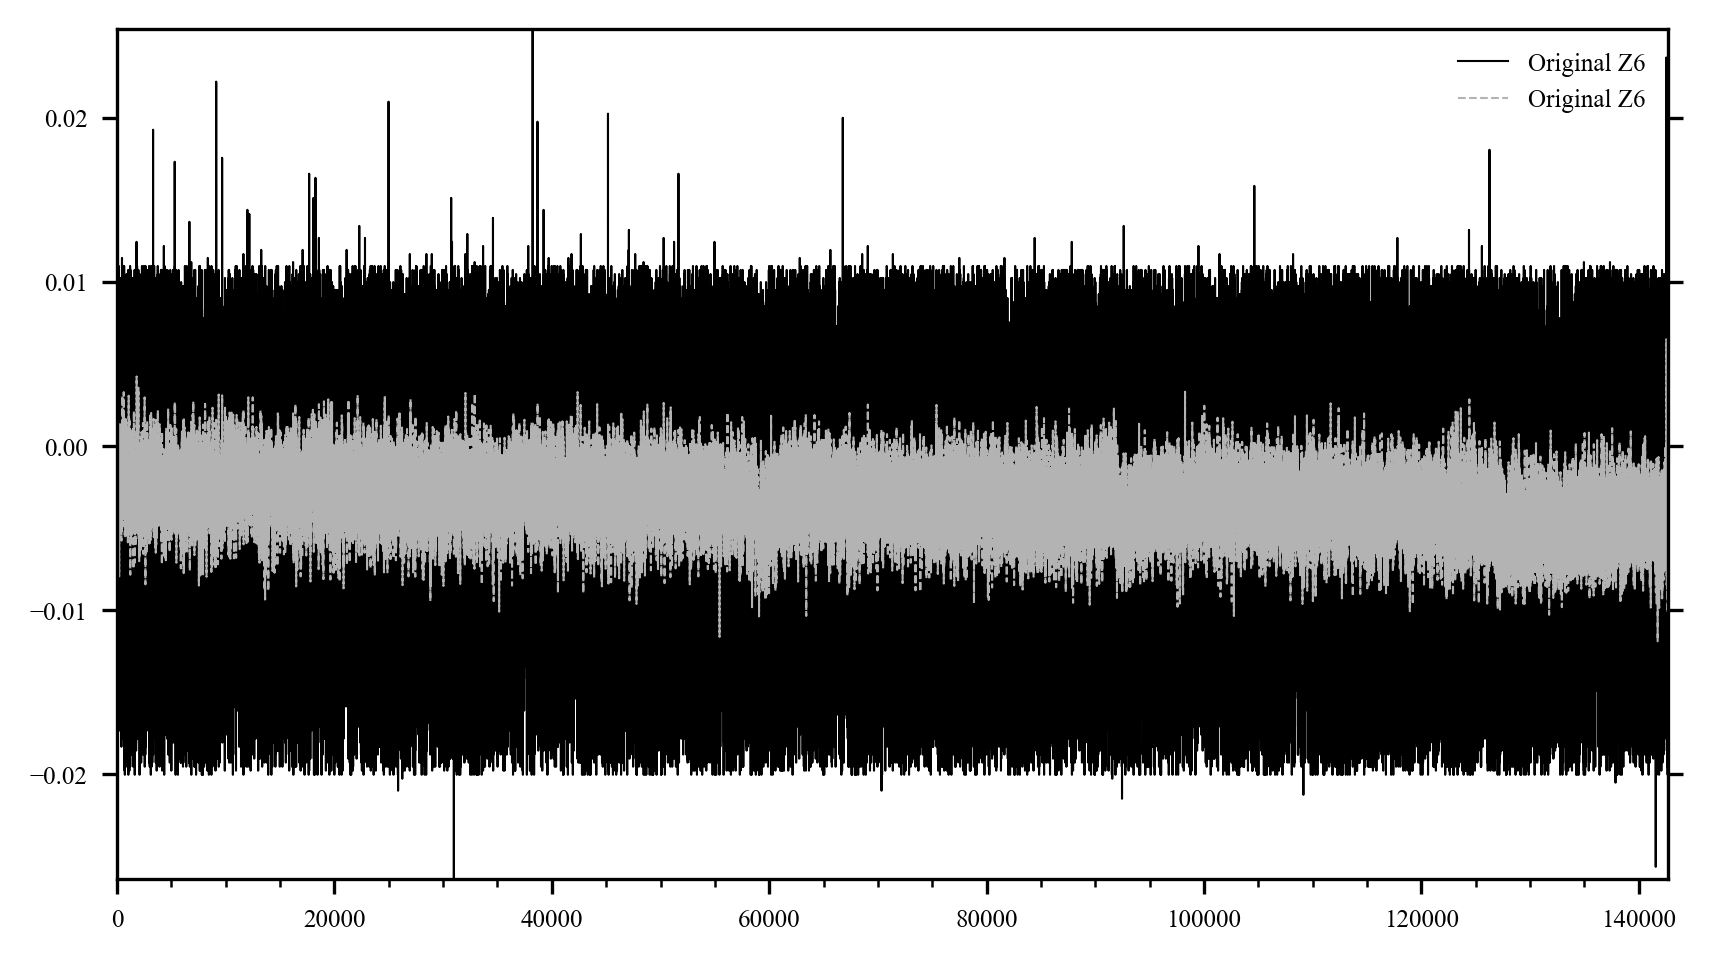

In [16]:
# Directory = './Data'
Directory = 'C:\\Users\\Dan\\Desktop\\Temp\\'
#Directory = 'C:\\Users\\dhendrickson\\Desktop\\AccelData\\home\\pi\\AccelData\\'
files = os.listdir(Directory)

#files = random.sample(files,2)

Reorder_cycler = (cycler('color', ['0.00', '0.70', '0.40', '0.90']) + cycler(linestyle=['-', '--', ':', '-.']))
plt.rc('axes', prop_cycle=Reorder_cycler)

start = 0
end = 800000

#start = 50000
#end = 60000

size = 5000
Arange = 10
coord = 2

Saving = True
location = Directory
Titles = False

for Filename in files:
    if Filename[-4:] ==  '.csv':
        ODataSet = np.genfromtxt(open(Directory+'/'+Filename,'r'), delimiter=',',skip_header=0)
        #ODataSet = ODataSet[:,1:5]
        length = np.shape(ODataSet)[0]

        SmoothRDataSet = np.zeros(np.shape(ODataSet)[0])
        SmoothXDataSet = np.zeros(np.shape(ODataSet)[0])
        TdDataSet = np.zeros(np.shape(ODataSet)[0])

        results =[]

        fig=plt.figure(figsize=(6.67,3.75))


        #for i in range(int(length/size)):
        for i in range(18):
            StdDev = np.zeros(length)
            StdDevSmooth = np.zeros(length)
            coord = i+5
            
            SmoothRDataSet[0] = 0
            SmoothXDataSet[0] = 0
            StdDev[0]=0
            StdDevSmooth[0]=0

            factor = np.average(np.power(np.power(ODataSet[:,1],2)+np.power(ODataSet[:,2],2),0.5))

            TdDataSet[0] = np.sqrt(ODataSet[0,1]**2+ODataSet[0,2]**2)-factor
            TdDataSet[1] = np.sqrt(ODataSet[1,1]**2+ODataSet[1,2]**2)-factor
            for j in range(Arange-1):
                k = j+2
                TdDataSet[k] = np.sqrt(ODataSet[k,1]**2+ODataSet[k,2]**2+ODataSet[k,3]**2)-factor
            for j in range(length-Arange):
                k = (length-1)-j
                TdDataSet[k] = np.sqrt(ODataSet[k,1]**2+ODataSet[k,2]**2+ODataSet[k,3]**2)-factor
            for j in range(Arange-1):
                k = j+2
                SmoothXDataSet[k] = np.average(ODataSet[0:k,coord])
                #StdDev[k]=st.stdev(ODataSet[0:k,coord])
                StdDevSmooth[k] = st.stdev(TdDataSet[0:k])
                SmoothRDataSet[k] = np.average(TdDataSet[0:k])
            for j in range(length-Arange):
                k = (length-1)-j
                SmoothXDataSet[k] = np.average(ODataSet[k-Arange:k,coord])
                #StdDev[k]=st.stdev(ODataSet[k-Arange:k,coord])
                StdDevSmooth[k]=st.stdev(TdDataSet[k-Arange:k])
                SmoothRDataSet[k] = np.average(TdDataSet[k-Arange:k])
            
            plt.plot(ODataSet[start:end,coord], label = 'Original ' + Header[coord])
            plt.plot(SmoothXDataSet[start:end], label = 'Original ' + Header[coord])
            plt.plot(TdDataSet[start:end]) #, label = 'Smoothed Signal')
            plt.plot(StdDevSmooth[start:end]) #,label = 'StdDev of signal')
            plt.plot(SmoothRDataSet[start:end]) #, label = 'Smoothed Signal')
            
            
            
            #plt.show()
            #print(title,max(StdDev),max(SmoothXDataSet[start:end]))
        
            title = Filename + ' ' + Header[coord]
            if Saving: plt.savefig(location+title.replace(" ", "").replace(":", "").replace(",", "")+FFormat)
        
            if Ledgends: plt.legend()
            if Titles: plt.title(title)
        
            plt.show()
        
        #results.append([np.average(DataSet[:,1][i*size:(i+1)*size]), np.average(DataSet[:,2][i*size:(i+1)*size]),np.average(DataSet[:,3][i*size:(i+1)*size])])

        #results = np.matrix(results)
        #df = pd.DataFrame(data=results.astype('float'))
        #df.to_csv('C:\\Users\\dhendrickson\\Desktop\\Phone Acceleration\\Gyro-output-' + Filename[10:20] + '.csv', sep=',', header=False, float_format='%.8f')
        #PlotFingerPrint(DataSet[:,coord][start:end],'a',title,'coif1')

Saving = False
Titles = True

In [ ]:

for i in range(18):
    coord = i + 4
    ODataSet[start:end,coord], label = 'Original ' + Header[coord])
    

In [1]:
import time as time


In [5]:
print(time.strftime('%y%m%d')+', '+time.strftime('%H%M%S'))

230530, 095613


In [6]:
import datetime

In [7]:
print(datetime.now().strftime('%H%M%S'))

AttributeError: module 'datetime' has no attribute 'now'

In [1]:
#Standard Header used on the projects

#first the major packages used for math and graphing
import numpy as np
import matplotlib.pyplot as plt
from cycler import cycler
import scipy.special as sp
import pickle

#Custome graph format style sheet
#plt.style.use('Prospectus.mplstyle')

#If being run by a seperate file, use the seperate file's graph format and saving paramaeters
#otherwise set what is needed
if not 'Saving' in locals():
    Saving = False
if not 'Titles' in locals():
    Titles = True
if not 'Ledgends' in locals():
    Ledgends = True
if not 'FFormat' in locals():
    FFormat = '.png'

#Standard cycle to make black and white images and dashed and line styles
default_cycler = (cycler('color', ['0.00', '0.40', '0.60', '0.70']) + cycler(linestyle=['-', '-', '-', '-']))
plt.rc('axes', prop_cycle=default_cycler)
my_cmap = plt.get_cmap('gray')

In [2]:
#Extra Headers:
import os as os
import pywt as py
import statistics as st
import os as os
import random
import multiprocessing
from joblib import Parallel, delayed
import platform

from time import time as ti

# %%
import CoreFunctions as cf
from skimage.restoration import denoise_wavelet
# %%
from sklearn.model_selection import train_test_split
#import dask.dataframe as dd

In [3]:
import pywt
from pywt._extensions._pywt import (DiscreteContinuousWavelet, ContinuousWavelet,
                                Wavelet, _check_dtype)
from pywt._functions import integrate_wavelet, scale2frequency 
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from cycler import cycler
import platform
import datetime
from itertools import compress

In [4]:
# ## Choosing Platform
# Working is beinging conducted on several computers, and author needs to be able to run code on all without rewriting..  This segment of determines which computer is being used, and sets the directories accordingly.

# %%
HostName = platform.node()

if HostName == "Server":
    Computer = "Desktop"   
elif HostName[-6:] == 'wm.edu':
    Computer = "SciClone"
elif HostName == "SchoolLaptop":
    Computer = "LinLap"
elif HostName == "WTC-TAB-512":
    Computer = "PortLap"
else:
    Computer = "WinLap"

# %%
if Computer == "SciClone":
    location = '/sciclone/home/dchendrickson01/image/'
elif Computer == "WinLap":
    location = 'C:\\Data\\'
elif Computer == "Desktop":
    location = "E:\\Backups\\Dan\\CraneData\\"
elif Computer == "LinLap":
    location = '/home/dan/Output/'
elif Computer == 'PortLap':
    location = 'C:\\users\\dhendrickson\\Desktop\\AccelData\\'

In [6]:
if Computer ==  "SciClone":
    rootfolder = '/sciclone/home/dchendrickson01/'
    folder = '/scratch/Recordings2/'
    imageFolder = '/scratch/Move3Dprint/'
    
    rootfolder = '/sciclone/home/dchendrickson01/'
    folder = '//sciclone/scr10/dchendrickson01/Recordings2/'
    imageFolder = '//sciclone/scr10/dchendrickson01/Move3Dprint/'
    SplitFolder = '//sciclone/scr10/dchendrickson01/RecordingsSplit/'

    
    
elif Computer == "Desktop":
    rootfolder = location
    folder = rootfolder + "Recordings2\\"
elif Computer =="WinLap":
    rootfolder = location
    folder = rootfolder + "Recordings2\\"   
elif Computer == "LinLap":
    rootfolder = '/home/dan/Data/'
    folder = rootfolder + 'Recordings2/'
elif Computer =='PortLap':
    rootfolder = location 
    folder = rootfolder + 'Recordings2\\'

# %% [markdown]
# ## Global Variables

In [9]:
files = os.listdir(SplitFolder+'xFold/')

In [10]:
files[:5]

['230522 recording2a-000001.p',
 '230522 recording2a-000004.p',
 '230522 recording2a-000005.p',
 '230522 recording2a-000006.p',
 '230522 recording2a-000010.p']

In [5]:
Saving = False
location = folder
Titles = True
Ledgends = True

f = 0

In [6]:
files = ['230418 recording1.csv','230419 recording1.csv','230420 recording1.csv','230421 recording1.csv',
         '230418 recording2.csv','230419 recording2.csv','230420 recording2.csv','230421 recording2.csv',
         '230425 recording1.csv','230425 recording2.csv','230426 recording2.csv','230427 recording2.csv',
         '230428 recording2.csv','230509 recording1.csv','230510 recording1.csv','230511 recording1.csv']

files = ['230926 recording2.csv','230928 recording2.csv','230929 recording2.csv','230927 recording2.csv',
         '230926 recording2.csv','231001 recording2.csv']
         


# %%
BeforeTamping = ['221206 recording1.csv','221207 recording1.csv','221208 recording1.csv','221209 recording1.csv',
         '221206 recording2.csv','221207 recording2.csv','221208 recording2.csv','221209 recording2.csv']


# %% [markdown]
# ## Project Specific Functions

In [7]:
def RollingStdDev(RawData, SmoothData, RollSize = 25):
    StdDevs = []
    for i in range(RollSize):
        Diffs = RawData[0:i+1]-SmoothData[0:i+1]
        Sqs = Diffs * Diffs
        Var = sum(Sqs) / (i+1)
        StdDev = np.sqrt(Var)
        StdDevs.append(StdDev)
    for i in range(len(RawData)-RollSize-1):
        j = i + RollSize
        Diffs = RawData[i:j]-SmoothData[i:j]
        Sqs = Diffs * Diffs
        Var = sum(Sqs) / RollSize
        StdDev = np.sqrt(Var)
        StdDevs.append(StdDev)  
    
    return StdDevs

def RollingSum(Data, Length = 100):
    RollSumStdDev = []
    for i in range(Length):
        RollSumStdDev.append(sum(Data[0:i+1]))
    for i in range(len(Data) - Length):
        RollSumStdDev.append(sum(Data[i:i+Length]))
    return RollSumStdDev

def SquelchPattern(DataSet, StallRange = 5000, SquelchLevel = 0.02):
    SquelchSignal = np.ones(len(DataSet))

    for i in range(len(DataSet)-2*StallRange):
        if np.average(DataSet[i:i+StallRange]) < SquelchLevel:
            SquelchSignal[i+StallRange]=0

    return SquelchSignal

def getVelocity(Acceleration, Timestamps = 0.003, Squelch = [], corrected = 0):
    velocity = np.zeros(len(Acceleration))
    
    Acceleration -= np.average(Acceleration)
    
    if len(Timestamps) == 1:
        dTime = np.ones(len(Acceleration),dtype=float) * Timestamps
    elif len(Timestamps) == len(Acceleration):
        dTime = np.zeros(len(Timestamps), dtype=float)
        dTime[0]=1
        for i in range(len(Timestamps)-1):
            j = i+1
            if Timestamps[j] > Timestamps[i]:
                dTime[j]=Timestamps[j]-Timestamps[i]
            else:
                dTime[j]=Timestamps[j]-Timestamps[i]+10000.0
        dTime /= 10000.0

    velocity[0] = Acceleration[0] * (dTime[0])

    for i in range(len(Acceleration)-1):
        j = i + 1
        if corrected ==2:
            if Squelch[j]==0:
                velocity[j]=0
            else:
                velocity[j] = velocity[i] + Acceleration[j] * dTime[j]                
        else:
            velocity[j] = velocity[i] + Acceleration[j] * dTime[j]

    if corrected == 1:
        PointVairance = velocity[-1:] / len(velocity)
        for i in range(len(velocity)):
            velocity[i] -=  PointVairance * i
    
    velocity *= 9.81

    return velocity

def MakeDTs(Seconds, Miliseconds):
    dts = np.zeros(len(Miliseconds), dtype=float)
    dts[0]=1
    for i in range(len(MiliSeconds)-1):
        j = i+1
        if Seconds[j]==Seconds[i]:
            dts[j]=Miliseconds[j]-Miliseconds[i]
        else:
            dts[j]=Miliseconds[j]-Miliseconds[i]+1000
    dts /= 10000
    return dts



In [49]:
ODataSet = np.genfromtxt(open(folder+files[14],'r'), delimiter=',',skip_header=0,missing_values=0,invalid_raise=False)

In [88]:
data_in = np.array(ODataSet[:,3]).flatten()

In [41]:
dets_to_remove=5
levels=None
wvt='sym2'

In [80]:
if len(data_in) % 10 != 0:
    for i in range(10 - len(data_in)%10):
        data_in = np.append(data_in, 0)

In [89]:
remainder = len(data_in) % 10
data_in=data_in[:-remainder]

In [90]:
np.shape(data_in)

(19272720,)

In [91]:
coeffs = pywt.swt(data_in, wvt, level=levels)

In [46]:
if levels is None:
    levels = len(coeffs)

In [47]:
np.shape(coeffs)

(1, 2, 19272726)

In [38]:
levels=2

In [40]:
for i in range(dets_to_remove):
    dets = np.asarray(coeffs[(levels-1)-i][1])
    dets[:] = 0

IndexError: list index out of range

In [ ]:
SmoothX = pywt.iswt(coeffs,wvt)

In [48]:
def lpf(data_in, wvt='sym2', dets_to_remove=5, levels=None):
    '''
    Function to filter out high frequency noise from a data signal. Usually 
    perform this before running the DWFT on the signal.
    
    data_in: input signal
    
    wvt: mother wavelet

    levels: number of levels to take in transformation

    dets_to_remove: details to remove in filter
    '''
    # vector needs to have an even length, so just zero pad if length is odd.
    if len(data_in) % 2 != 0:
        data_in = np.append(data_in, 0)
    
    coeffs = pywt.swt(data_in, wvt, level=levels)
    
    if levels is None:
        levels = len(coeffs)
    
    print(levels)
    
    for i in range(dets_to_remove):
        dets = np.asarray(coeffs[(levels-1)-i][1])
        dets[:] = 0
    
    filtered_signal = pywt.iswt(coeffs,wvt)
    return filtered_signal


In [92]:
np.shape(data_in)

(19272720,)

In [82]:
data_in[19272720:]

array([-0.01502, -0.00891, -0.01721, -0.04871, -0.06751,  0.     ,
        0.     ,  0.     ,  0.     ,  0.     ,  0.     ,  0.     ,
        0.     ,  0.     ,  0.     ,  0.     ,  0.     ,  0.     ,
        0.     ,  0.     ])

In [87]:
test=lpf(data_in[:-4])

5


In [ ]:
SmoothY = cf.Smoothing(ODataSet[:,4].T,3,dets_to_remove=3) #denoise_wavelet(ODataSet[:,4], method='VisuShrink', mode='soft', wavelet_levels=3, wavelet='sym2', rescale_sigma='True')
SmoothZ = cf.Smoothing(ODataSet[:,5].T,3,dets_to_remove=3) #denoise_wavelet(ODataSet[:,5], method='VisuShrink', mode='soft', wavelet_levels=3, wavelet='sym2', rescale_sigma='True')
SmoothX -= np.average(SmoothX)
SmoothY -= np.average(SmoothY)
SmoothZ -= np.average(SmoothZ)
StdDevsX = RollingStdDev(ODataSet[:,3],SmoothX)
StdDevsX.append(0)
StdDevsX = np.asarray(StdDevsX).flatten()
SmoothDevX = cf.Smoothing(StdDevsX,2,dets_to_remove=3)
SquelchSignal = SquelchPattern(StdDevsX, 2000, 0.03)
#Velocity = getVelocity(ODataSet[:,3], ODataSet[:,2],SquelchSignal, 2)
#Velocity = np.asarray(Velocity)
MoveMatrix = np.matrix([SmoothX, SmoothY, SmoothZ])
    

In [4]:
def split_list_by_ones(original_list, ones_list):
    result_sublists = []
    sublist = []

    for val, is_one in zip(original_list, ones_list):
        if is_one:
            sublist.append(val)
        elif sublist:
            result_sublists.append(sublist)
            sublist = []

    # Add the last sublist (if any)
    if sublist:
        result_sublists.append(sublist)

    return result_sublists

In [7]:
# Example usage
original_list = [1, 2, 3, 8, 7, 4, 5, 6, 4, 7, 8, 9]
ones_list = [1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1]

In [8]:
sublists = split_list_by_ones(original_list, ones_list)
print(sublists)  # Output: [[1, 2, 3, 8], [4, 5, 6], [8, 9]]

[[1, 2, 3, 8], [5, 6], [8, 9]]


In [1]:
def split_list_by_ones(original_list, ones_list):
    # Find indices where ones occur in the second list
    ones_indices = [i for i, val in enumerate(ones_list) if val == 1]

    # Initialize the start index for slicing
    start_idx = 0
    result_sublists = []

    # Iterate through the ones_indices to create sublists
    for end_idx in ones_indices:
        sublist = original_list[start_idx:end_idx]
        result_sublists.append(sublist)
        start_idx = end_idx + 1  # Move the start index to the next position

    # Add the last sublist (from the last 1 to the end of the list)
    result_sublists.append(original_list[start_idx:])

    return result_sublists

In [2]:
# Example usage
original_list = [1, 2, 3, 8, 7, 4, 5, 6, 4, 7, 8, 9]
ones_list =     [1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1]


return: [[1, 2, 3, 8], [4, 5, 6], [8,9]]

In [3]:
sublists = split_list_by_ones(original_list, ones_list)
print(sublists)

[[], [], [], [0, 0], [5], [0], [], [], []]


In [11]:
a= [1,2,3,2,3,4,5,2,4,6]

In [14]:
b=a[:]==2

In [15]:
b

False

In [16]:
any(2 in x for x in a)

TypeError: argument of type 'int' is not iterable